# **Seaborn Practice**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

In [4]:
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [5]:
df.shape

(344, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Let's take a look at missing data with the isnull method.

In [7]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Let us have a look at categorical columns ['species','island','sex']

In [8]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [9]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [10]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

Dropping null values

In [11]:
df.dropna(axis=0, inplace=True)
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
4         3450.0  FEMALE  
5         3650.0    MALE  
..           ...     ...  
338       4925.0  FEMALE  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[333 rows x 7 columns]

## Categories of the columns with Piechart

<Axes: ylabel='species'>

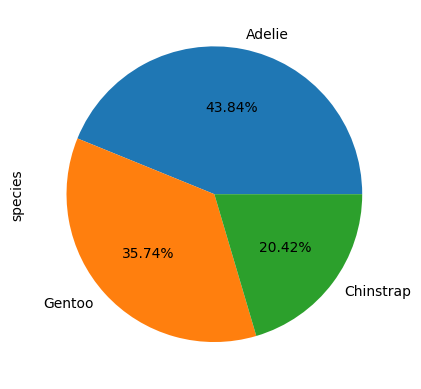

In [12]:
species = df.species.value_counts()
species.plot(kind='pie',autopct="%0.2f%%")

<Axes: ylabel='island'>

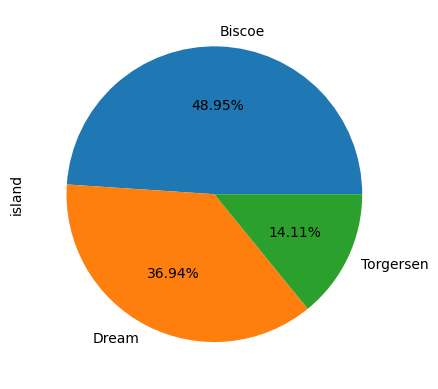

In [13]:
island = df.island.value_counts()
island.plot(kind='pie',autopct="%0.2f%%")

<Axes: ylabel='sex'>

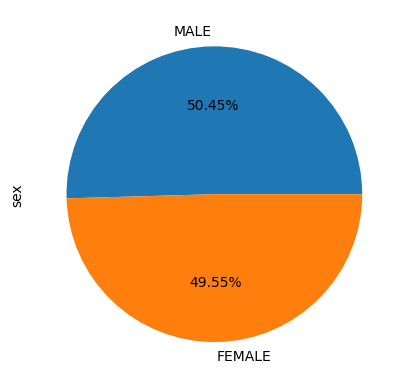

In [14]:
sex = df.sex.value_counts()
sex.plot(kind='pie',autopct="%0.2f%%")

In [15]:
df.sex.value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

Setting the graphic theme


In [16]:
sns.set_theme()
sns.set(rc={"figure.figsize":(12,8), "figure.dpi":300})

In [17]:
import warnings
warnings.filterwarnings('ignore')

## **Scatter Plot**

* The scatter plot is used to display the relationship between variables. Let’s see the scatter plot of culmen lengths and depths by penguin species.

Text(0.5, 1.0, 'Bill Length vs Bill Depth')

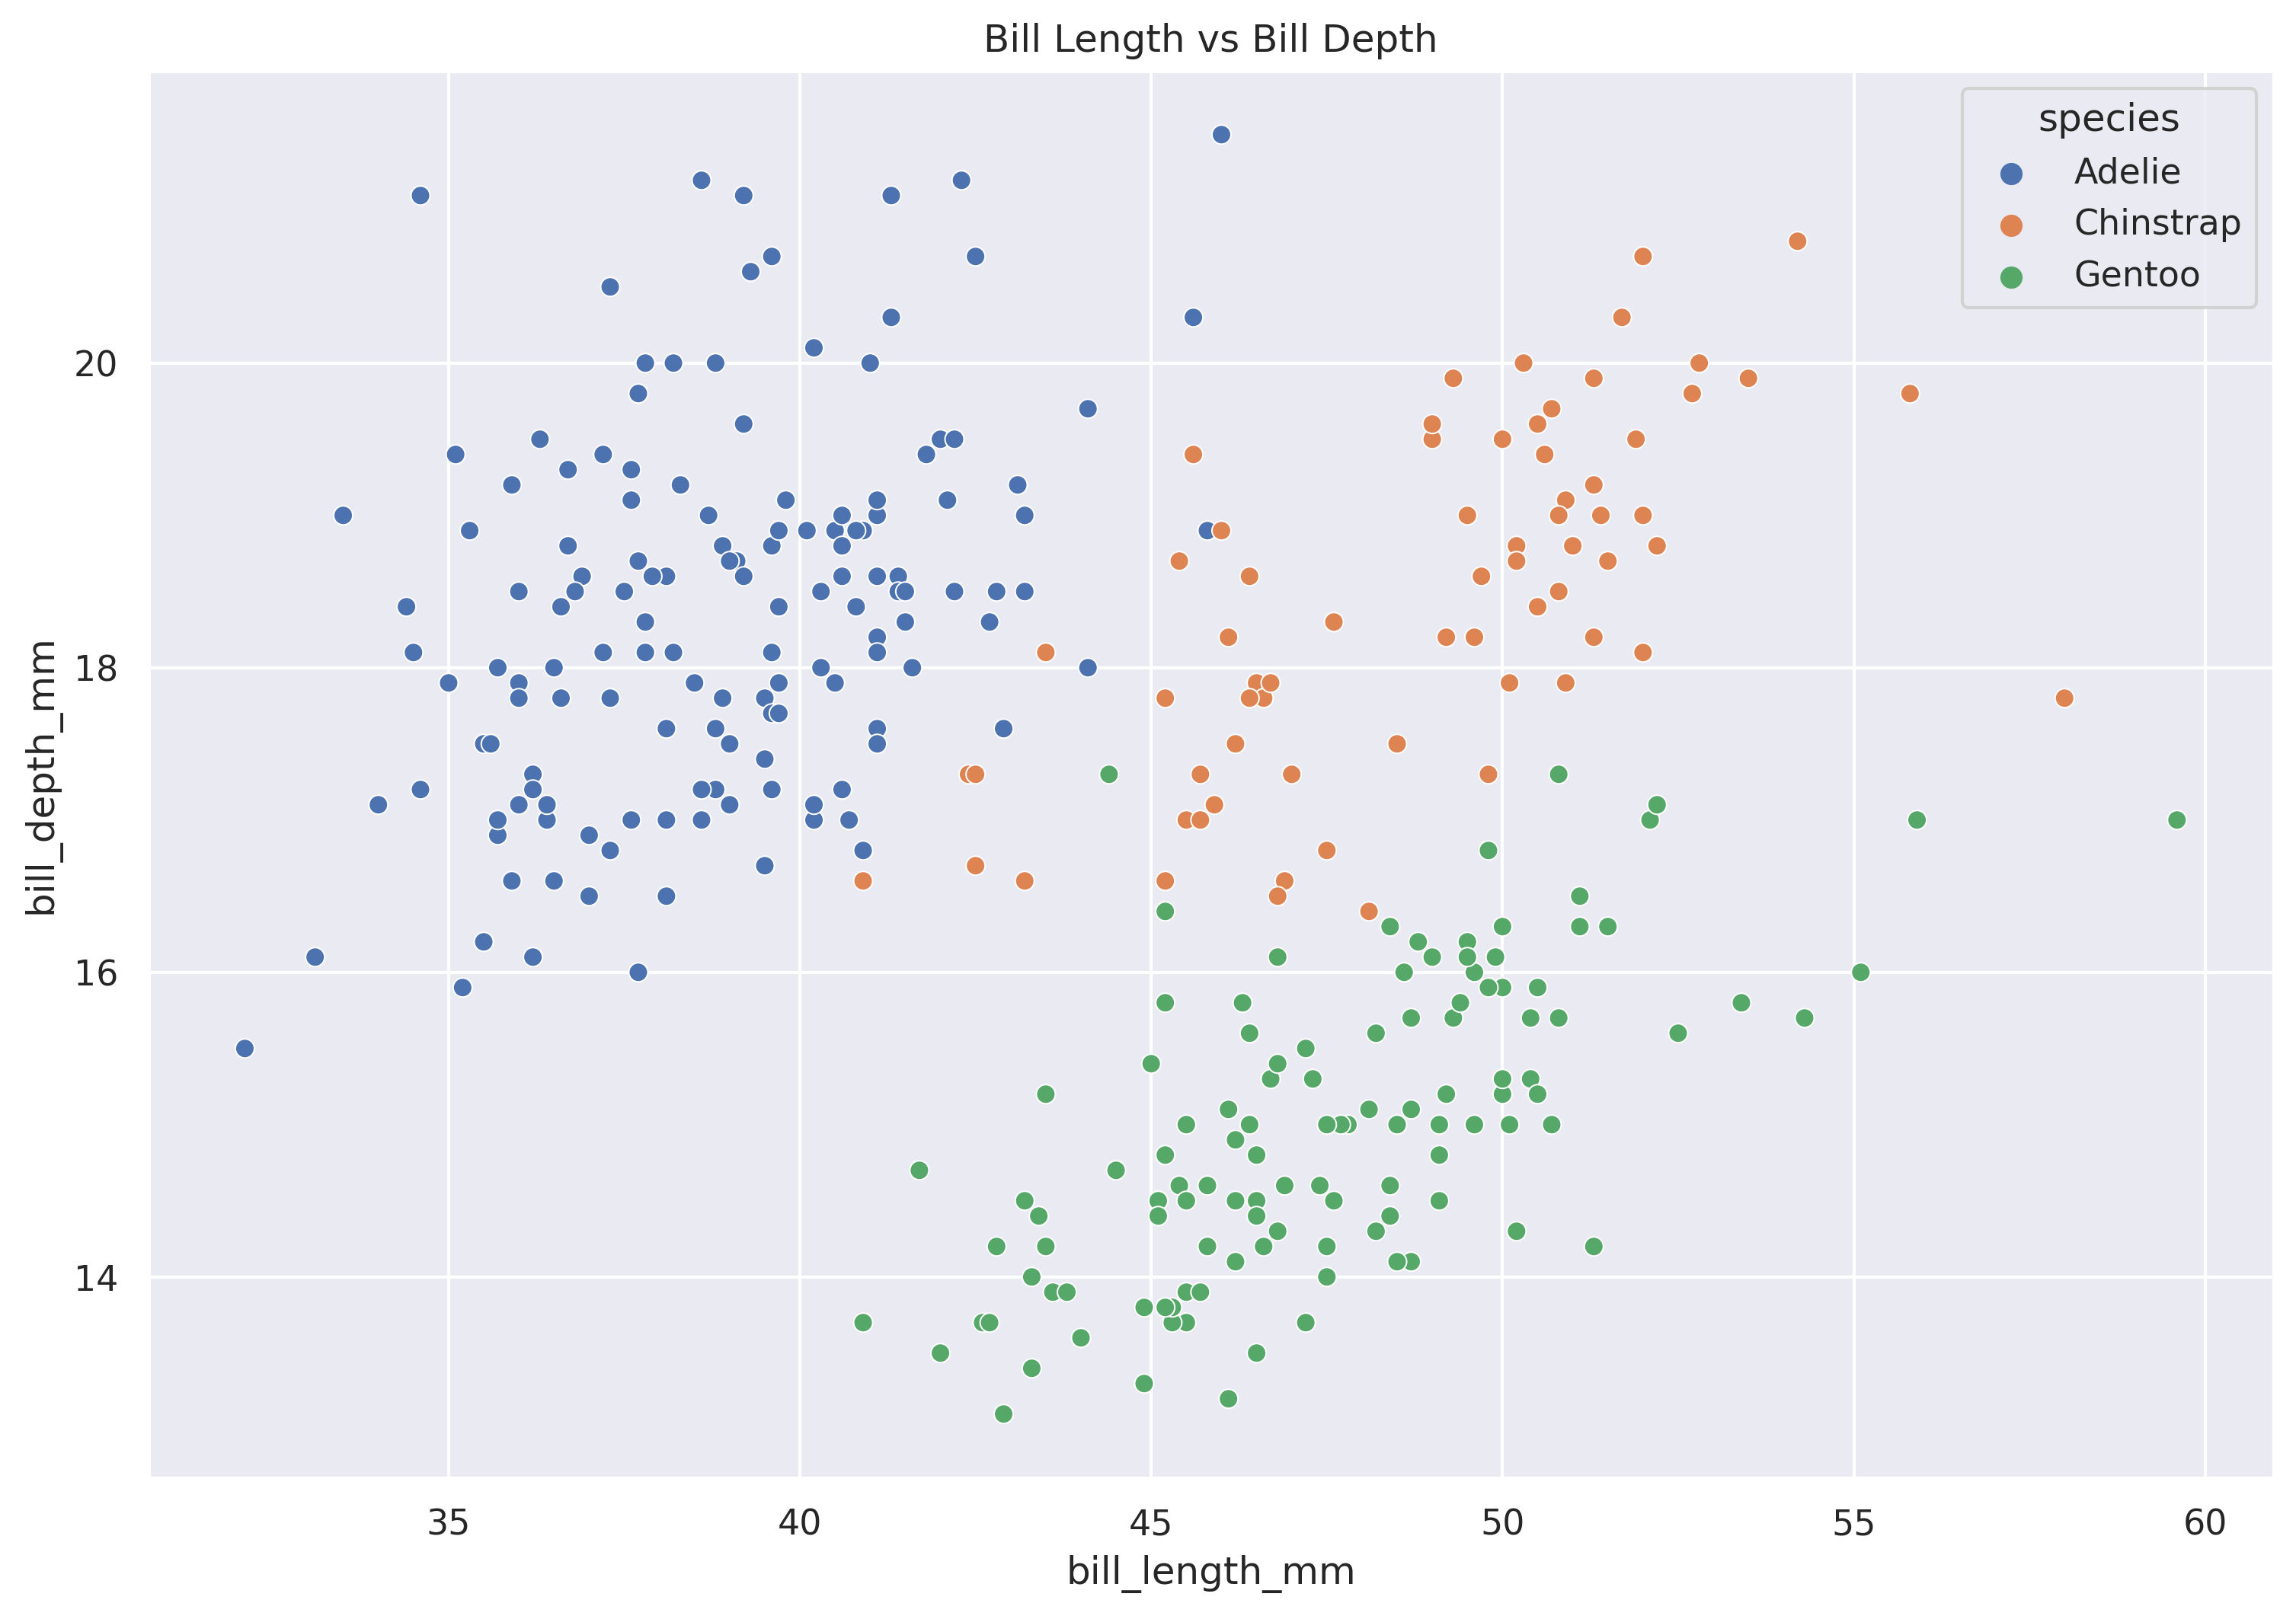

In [18]:
sns.scatterplot(x="bill_length_mm",y="bill_depth_mm", data=df, hue="species")
plt.title("Bill Length vs Bill Depth")

## **Histogram**

* The histogram plot shows the distribution of the data. You can use the histogram plot to see the distribution of one or more variables. Now let’s see the histogram of the flipper length using the histplot function.

Text(0.5, 1.0, 'Flipper Length')

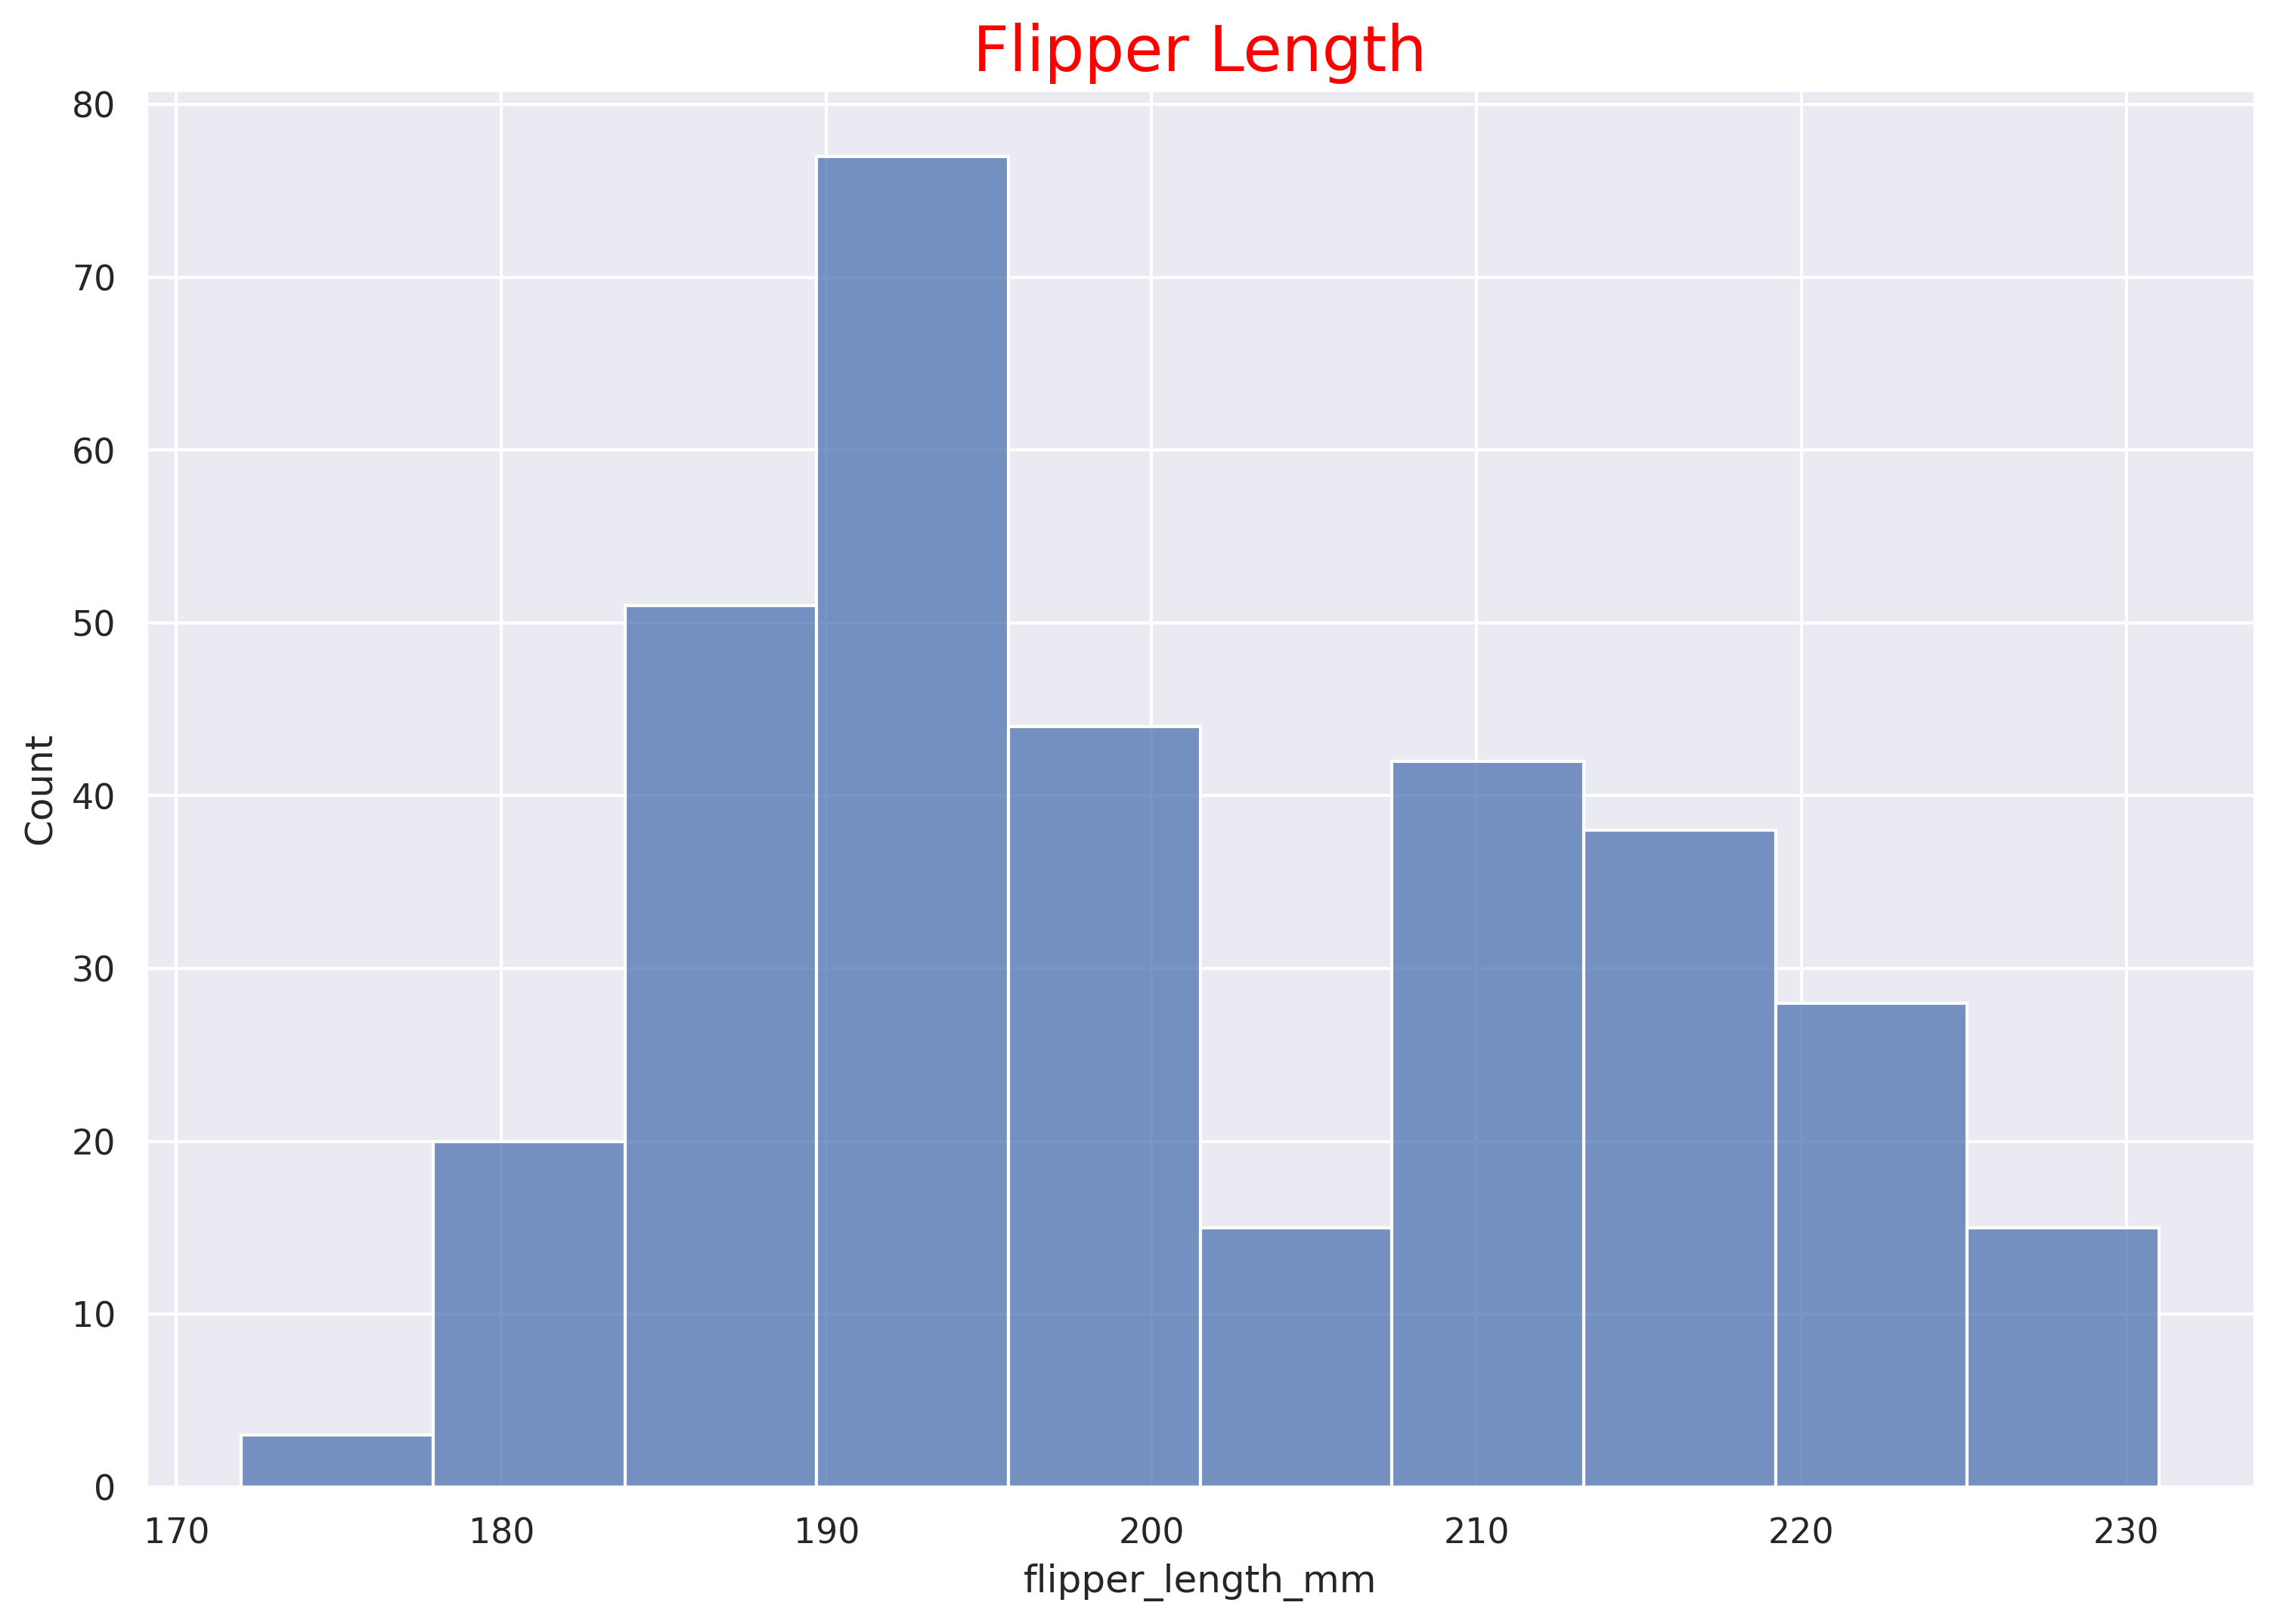

In [19]:
sns.histplot(x='flipper_length_mm',data=df)
plt.title("Flipper Length", size=20, color ='red')

We can also flip the argument to the y axis

Text(0.5, 1.0, 'Flipper Length')

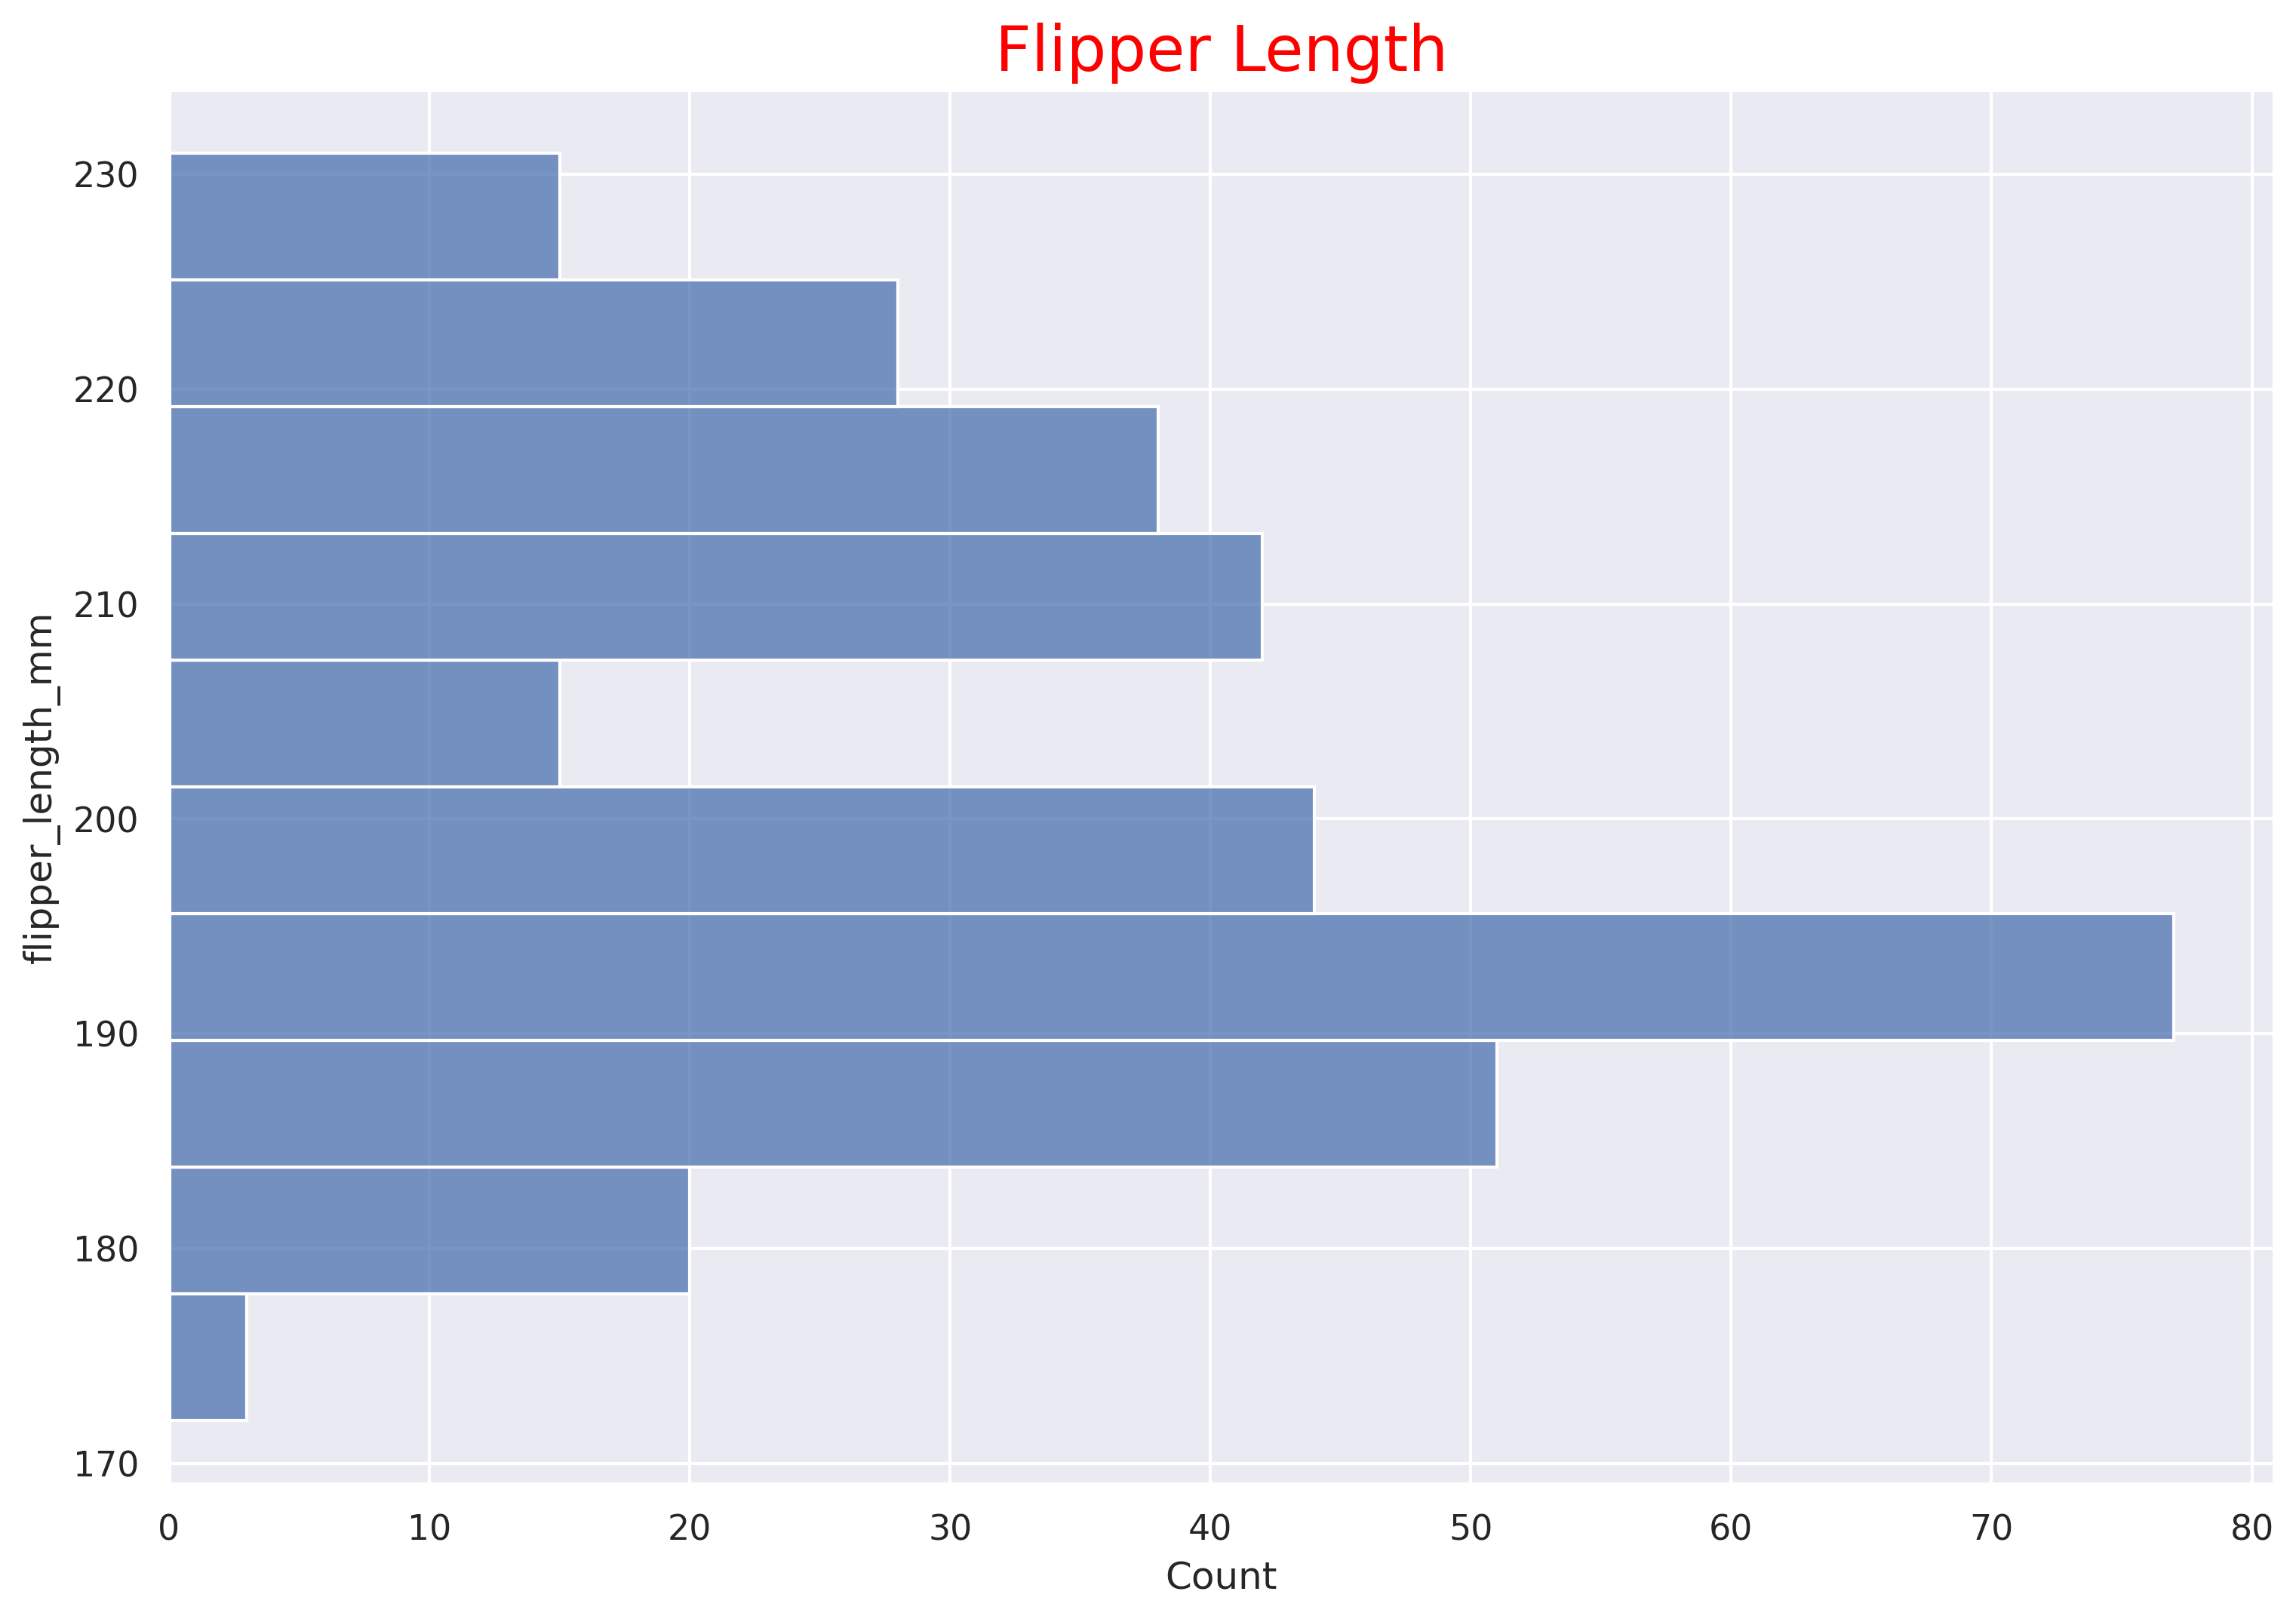

In [20]:
sns.histplot(y='flipper_length_mm',data=df)
plt.title("Flipper Length", size=20, color ='red')

You can also add the **kde**, which represents the probability distribution curve, to the histogram plot.

Text(0.5, 1.0, 'Flipper Length')

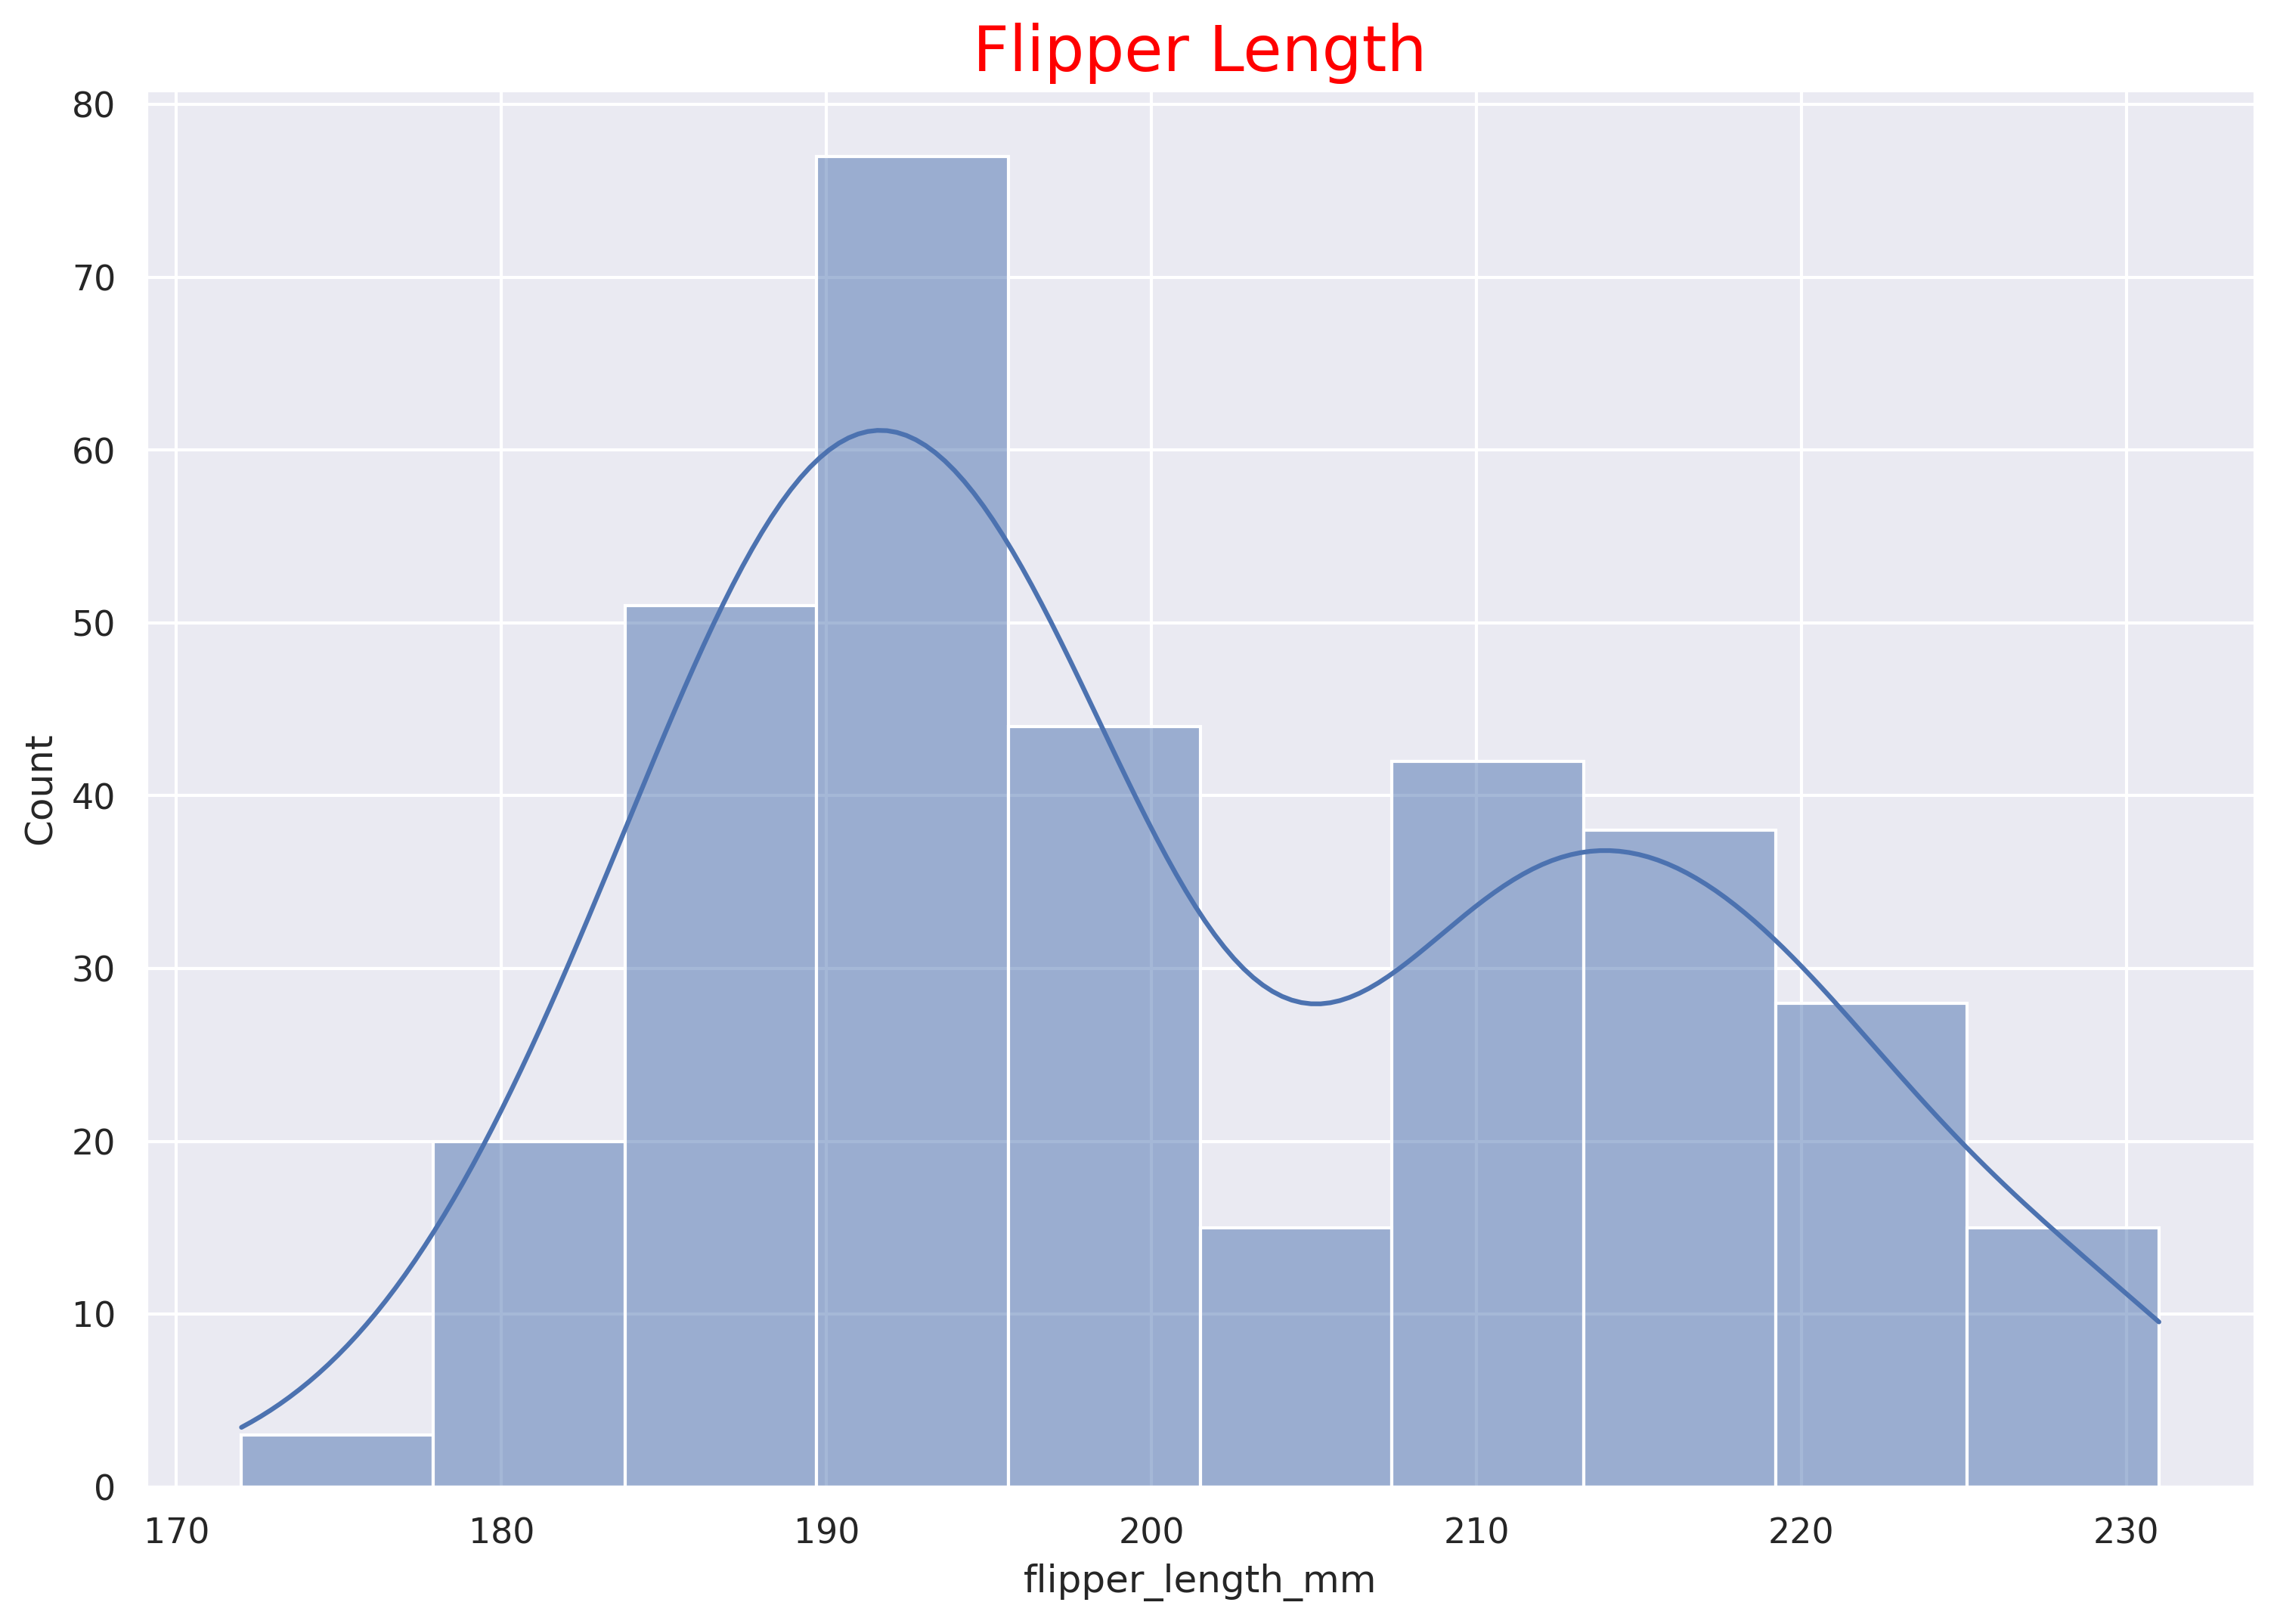

In [21]:
sns.histplot(x='flipper_length_mm',data=df,kde=True)
plt.title("Flipper Length", size=20, color ='red')

You can use the **hue** parameter to see the histograms of categories.

Text(0.5, 1.0, 'Flipper Length')

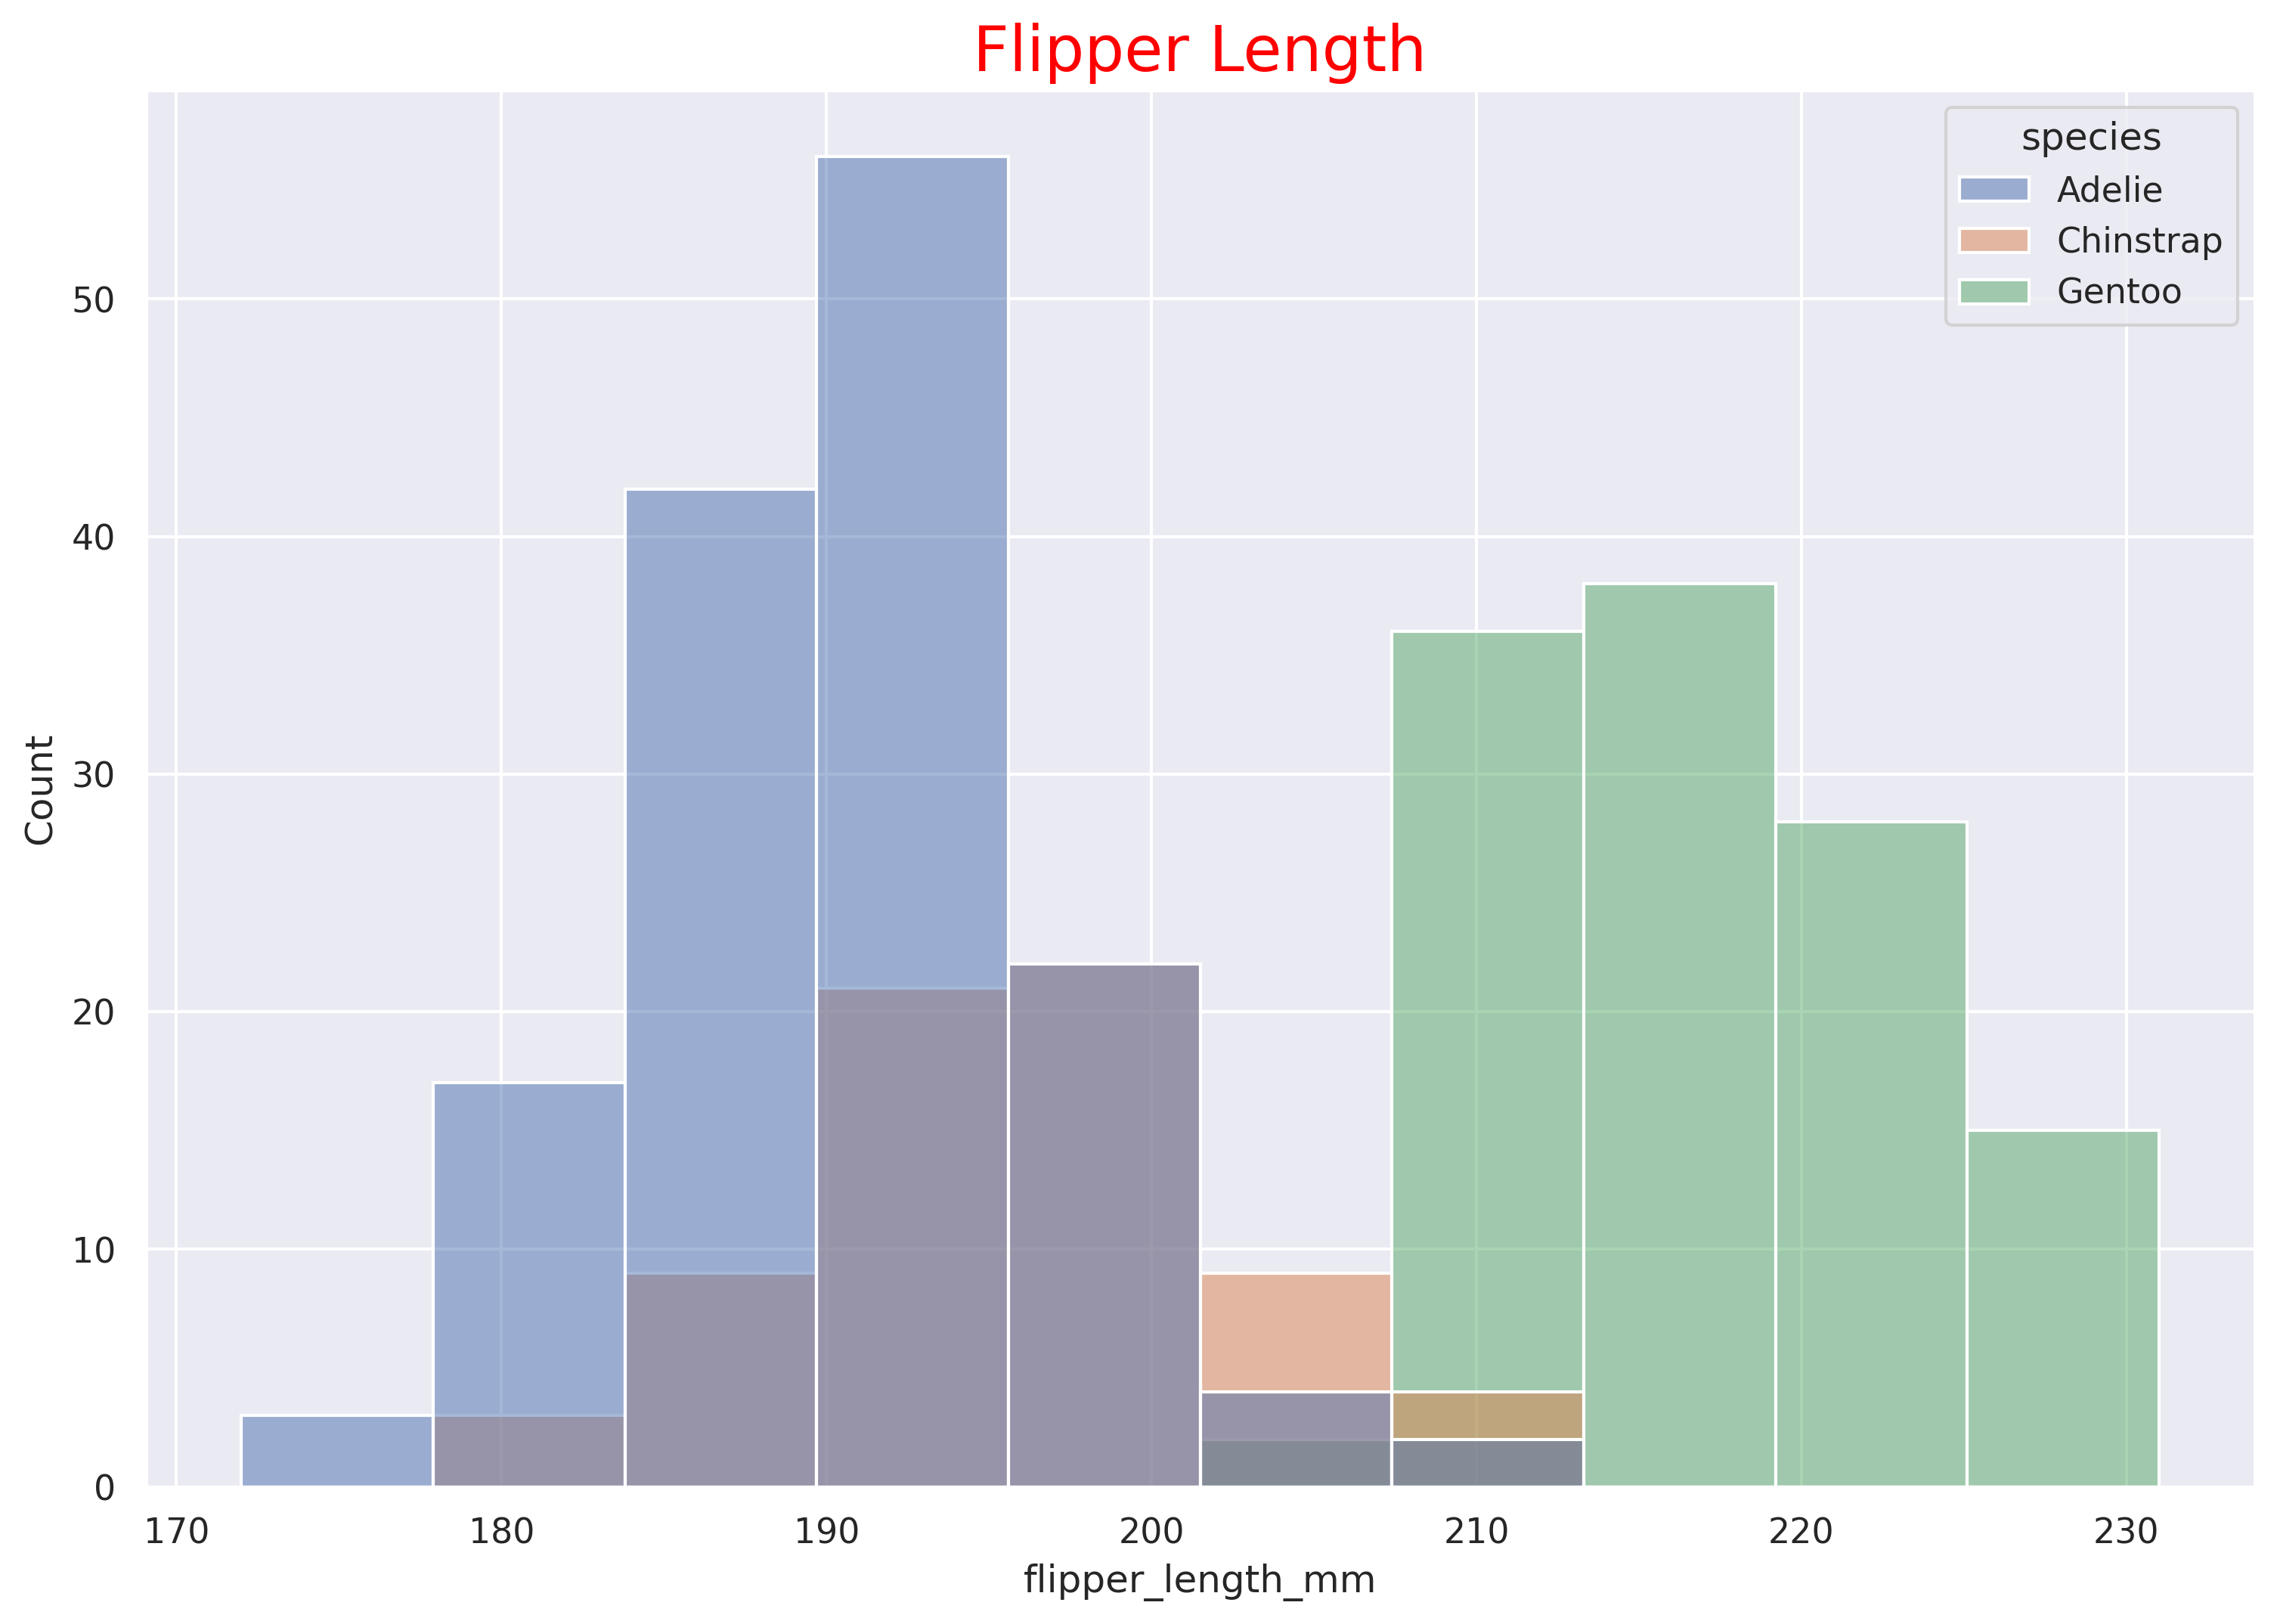

In [22]:
sns.histplot(x = "flipper_length_mm", data = df, hue = "species")
plt.title("Flipper Length", size=20, color="red")


## **Bar Plot**

* A bar plot represents an estimate of the central tendency for a numeric variable with the height of each rectangle. Let’s see the bar plot showing the flipper lengths of penguin species.

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species')

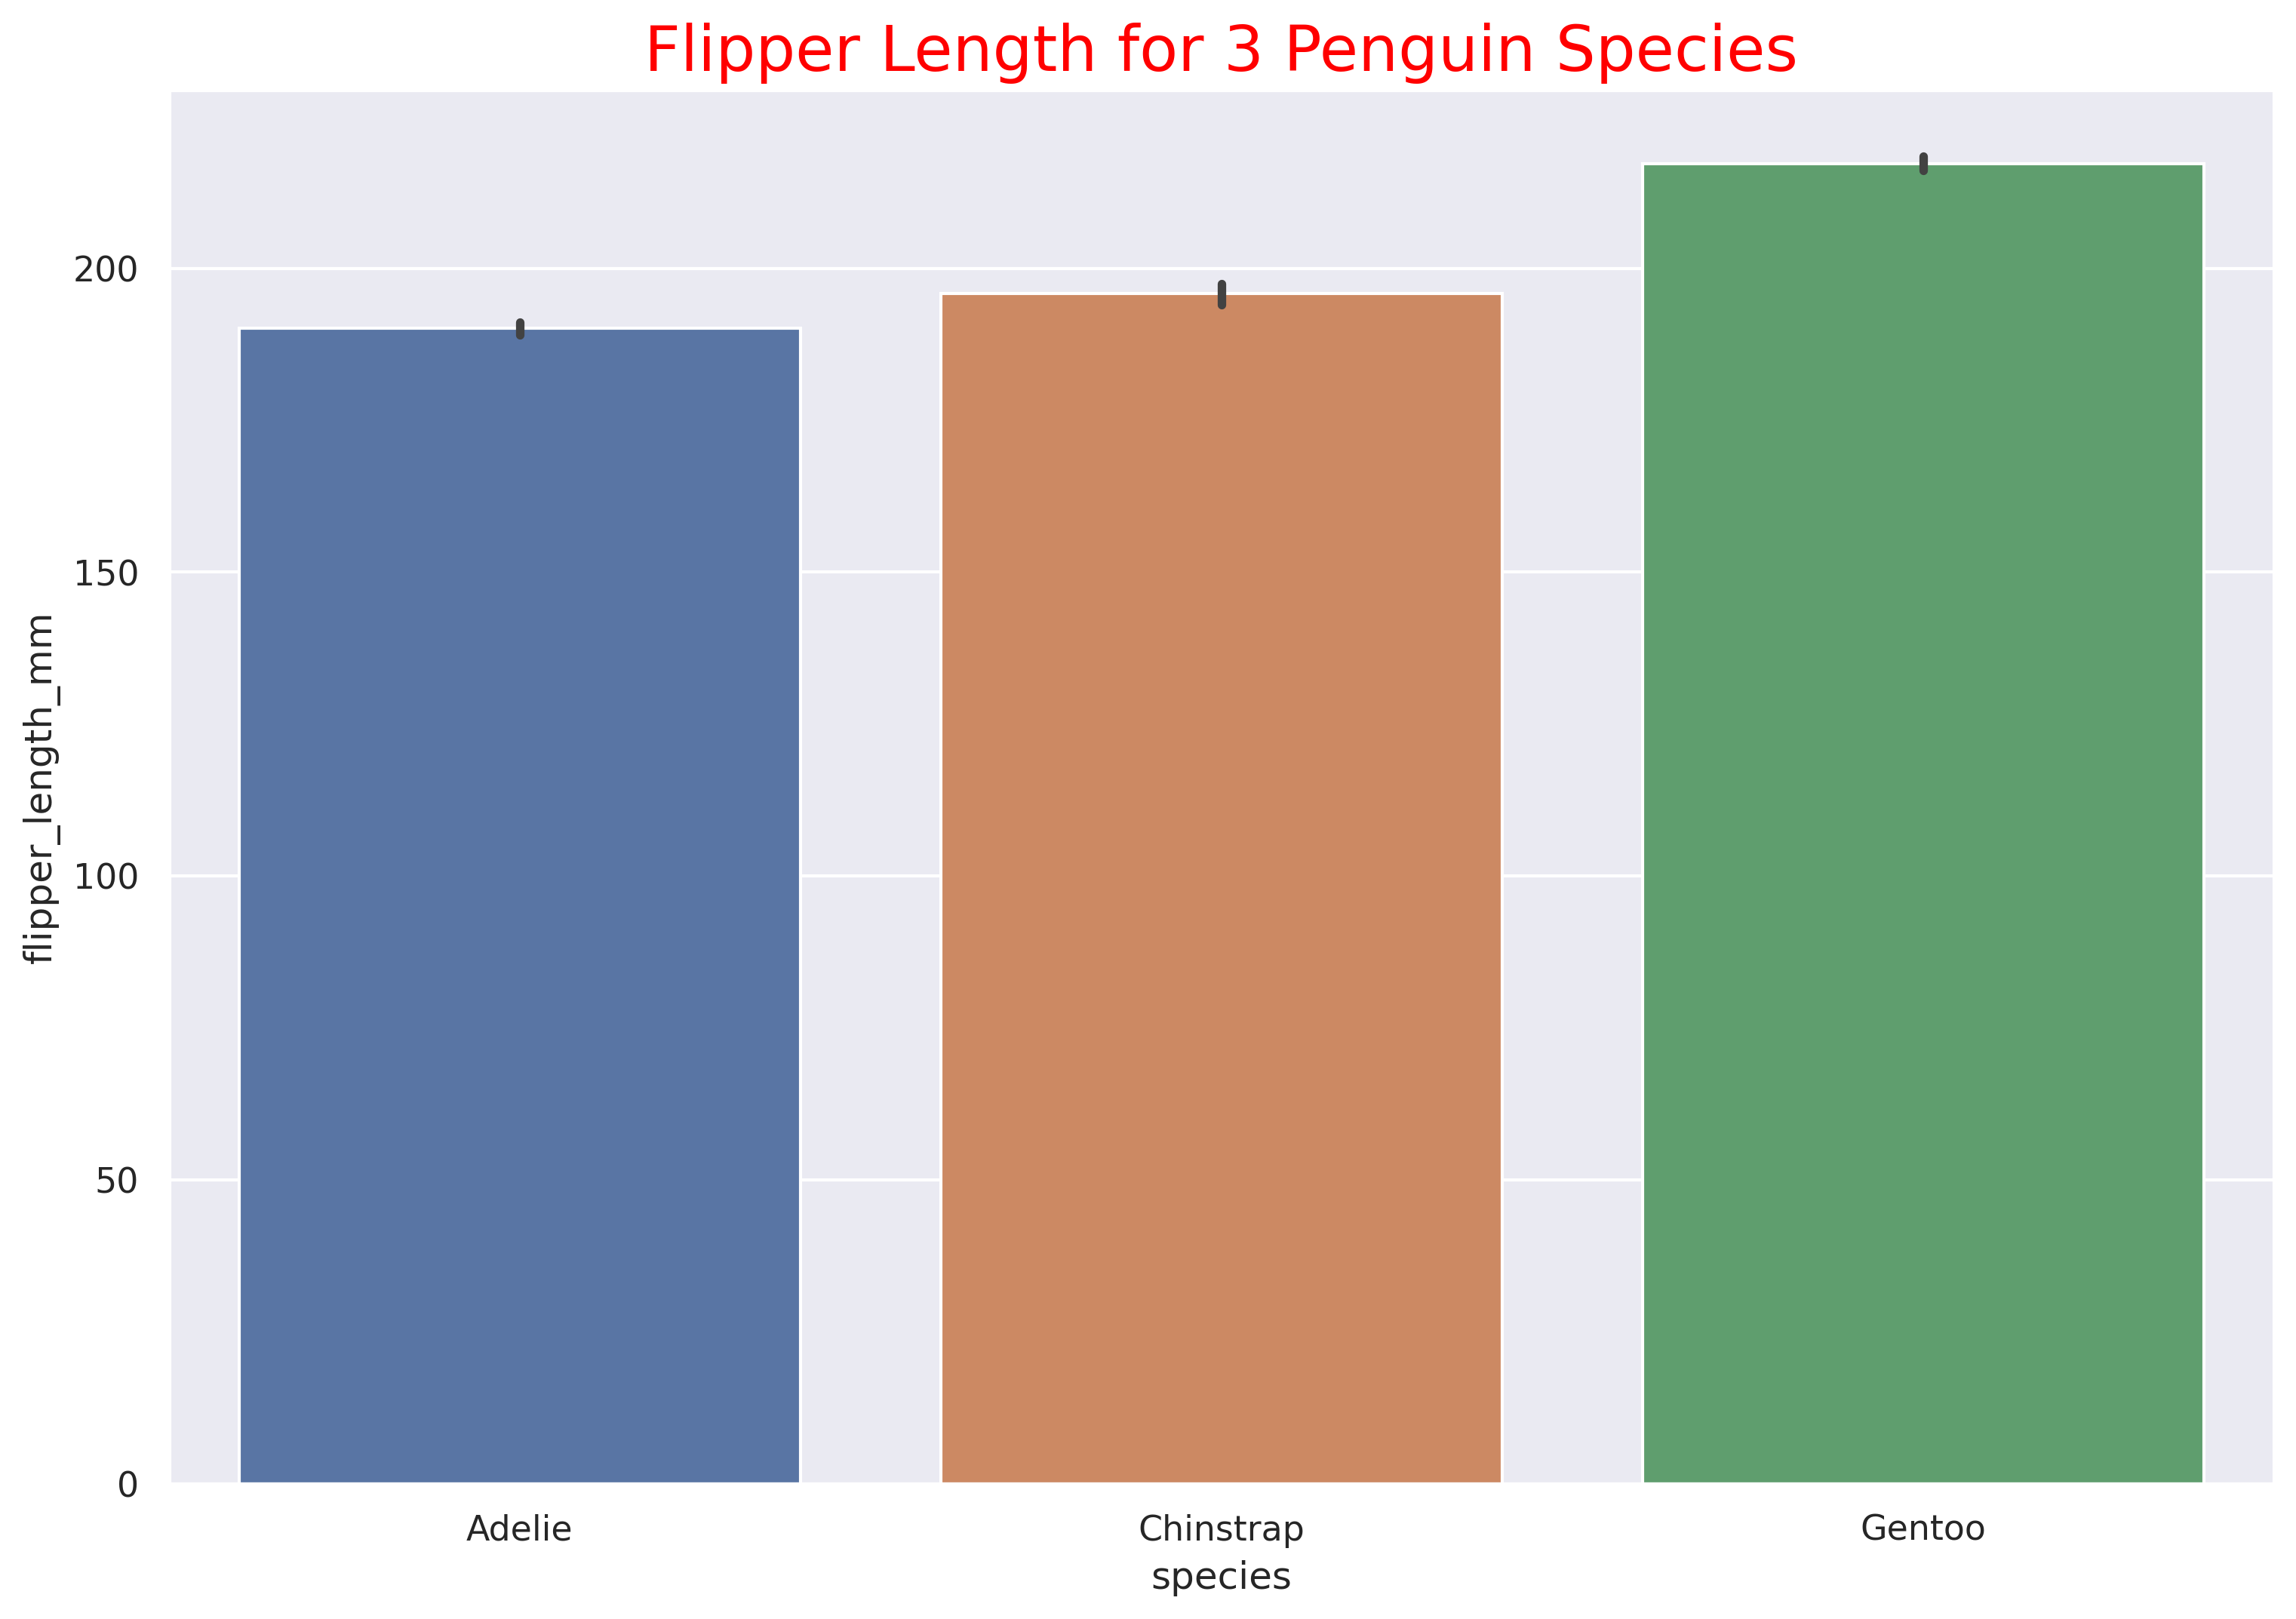

In [23]:
sns.barplot(x ="species", y="flipper_length_mm", data=df)
plt.title("Flipper Length for 3 Penguin Species", size=20, color="red")

* By default, the bars are calculated based on the mean of the values.
* You can use another statistic instead of the mean using the estimator parameter.
* Let us use the hue parameter to see the flipper lengths of the species by sex.

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species by Sex')

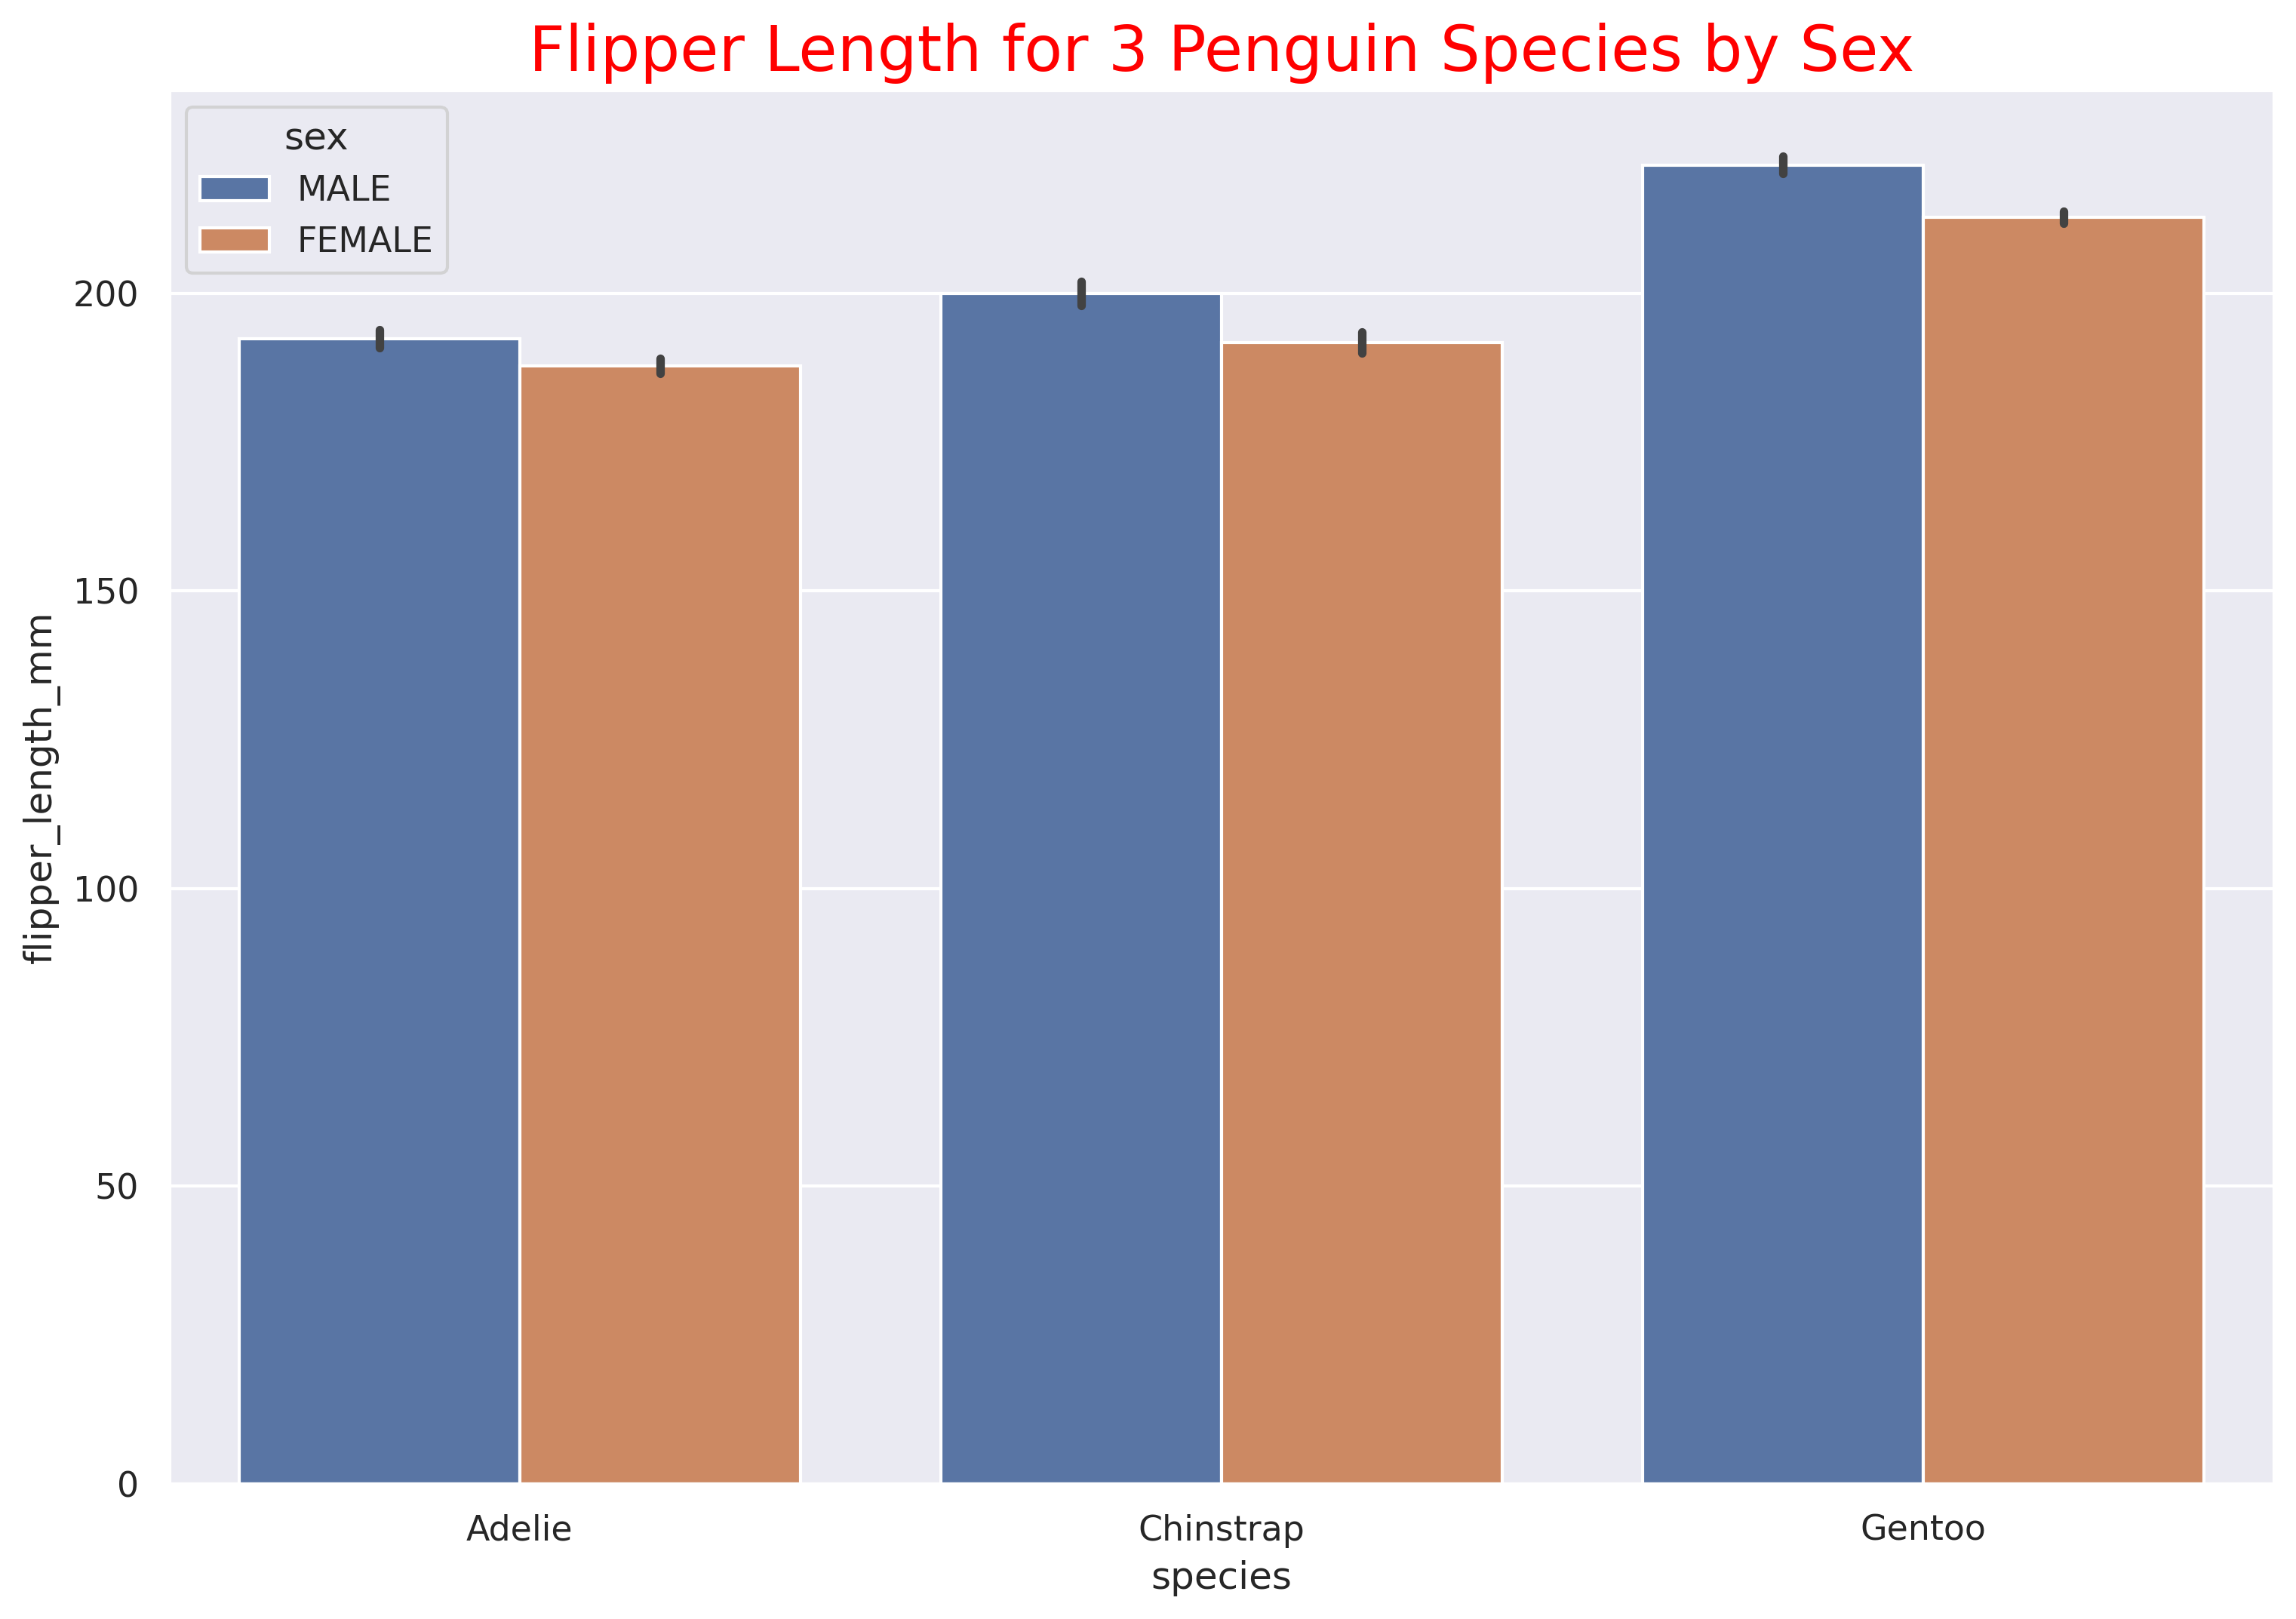

In [24]:
sns.barplot(x = "species", y = "flipper_length_mm", data =df, hue = "sex")
plt.title("Flipper Length for 3 Penguin Species by Sex", size=20, color="red")

## **Box Plot**

* The box plot is used to compare the distribution of numerical data between levels of a categorical variable. Let’s see the distribution of flipper length by species.

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species')

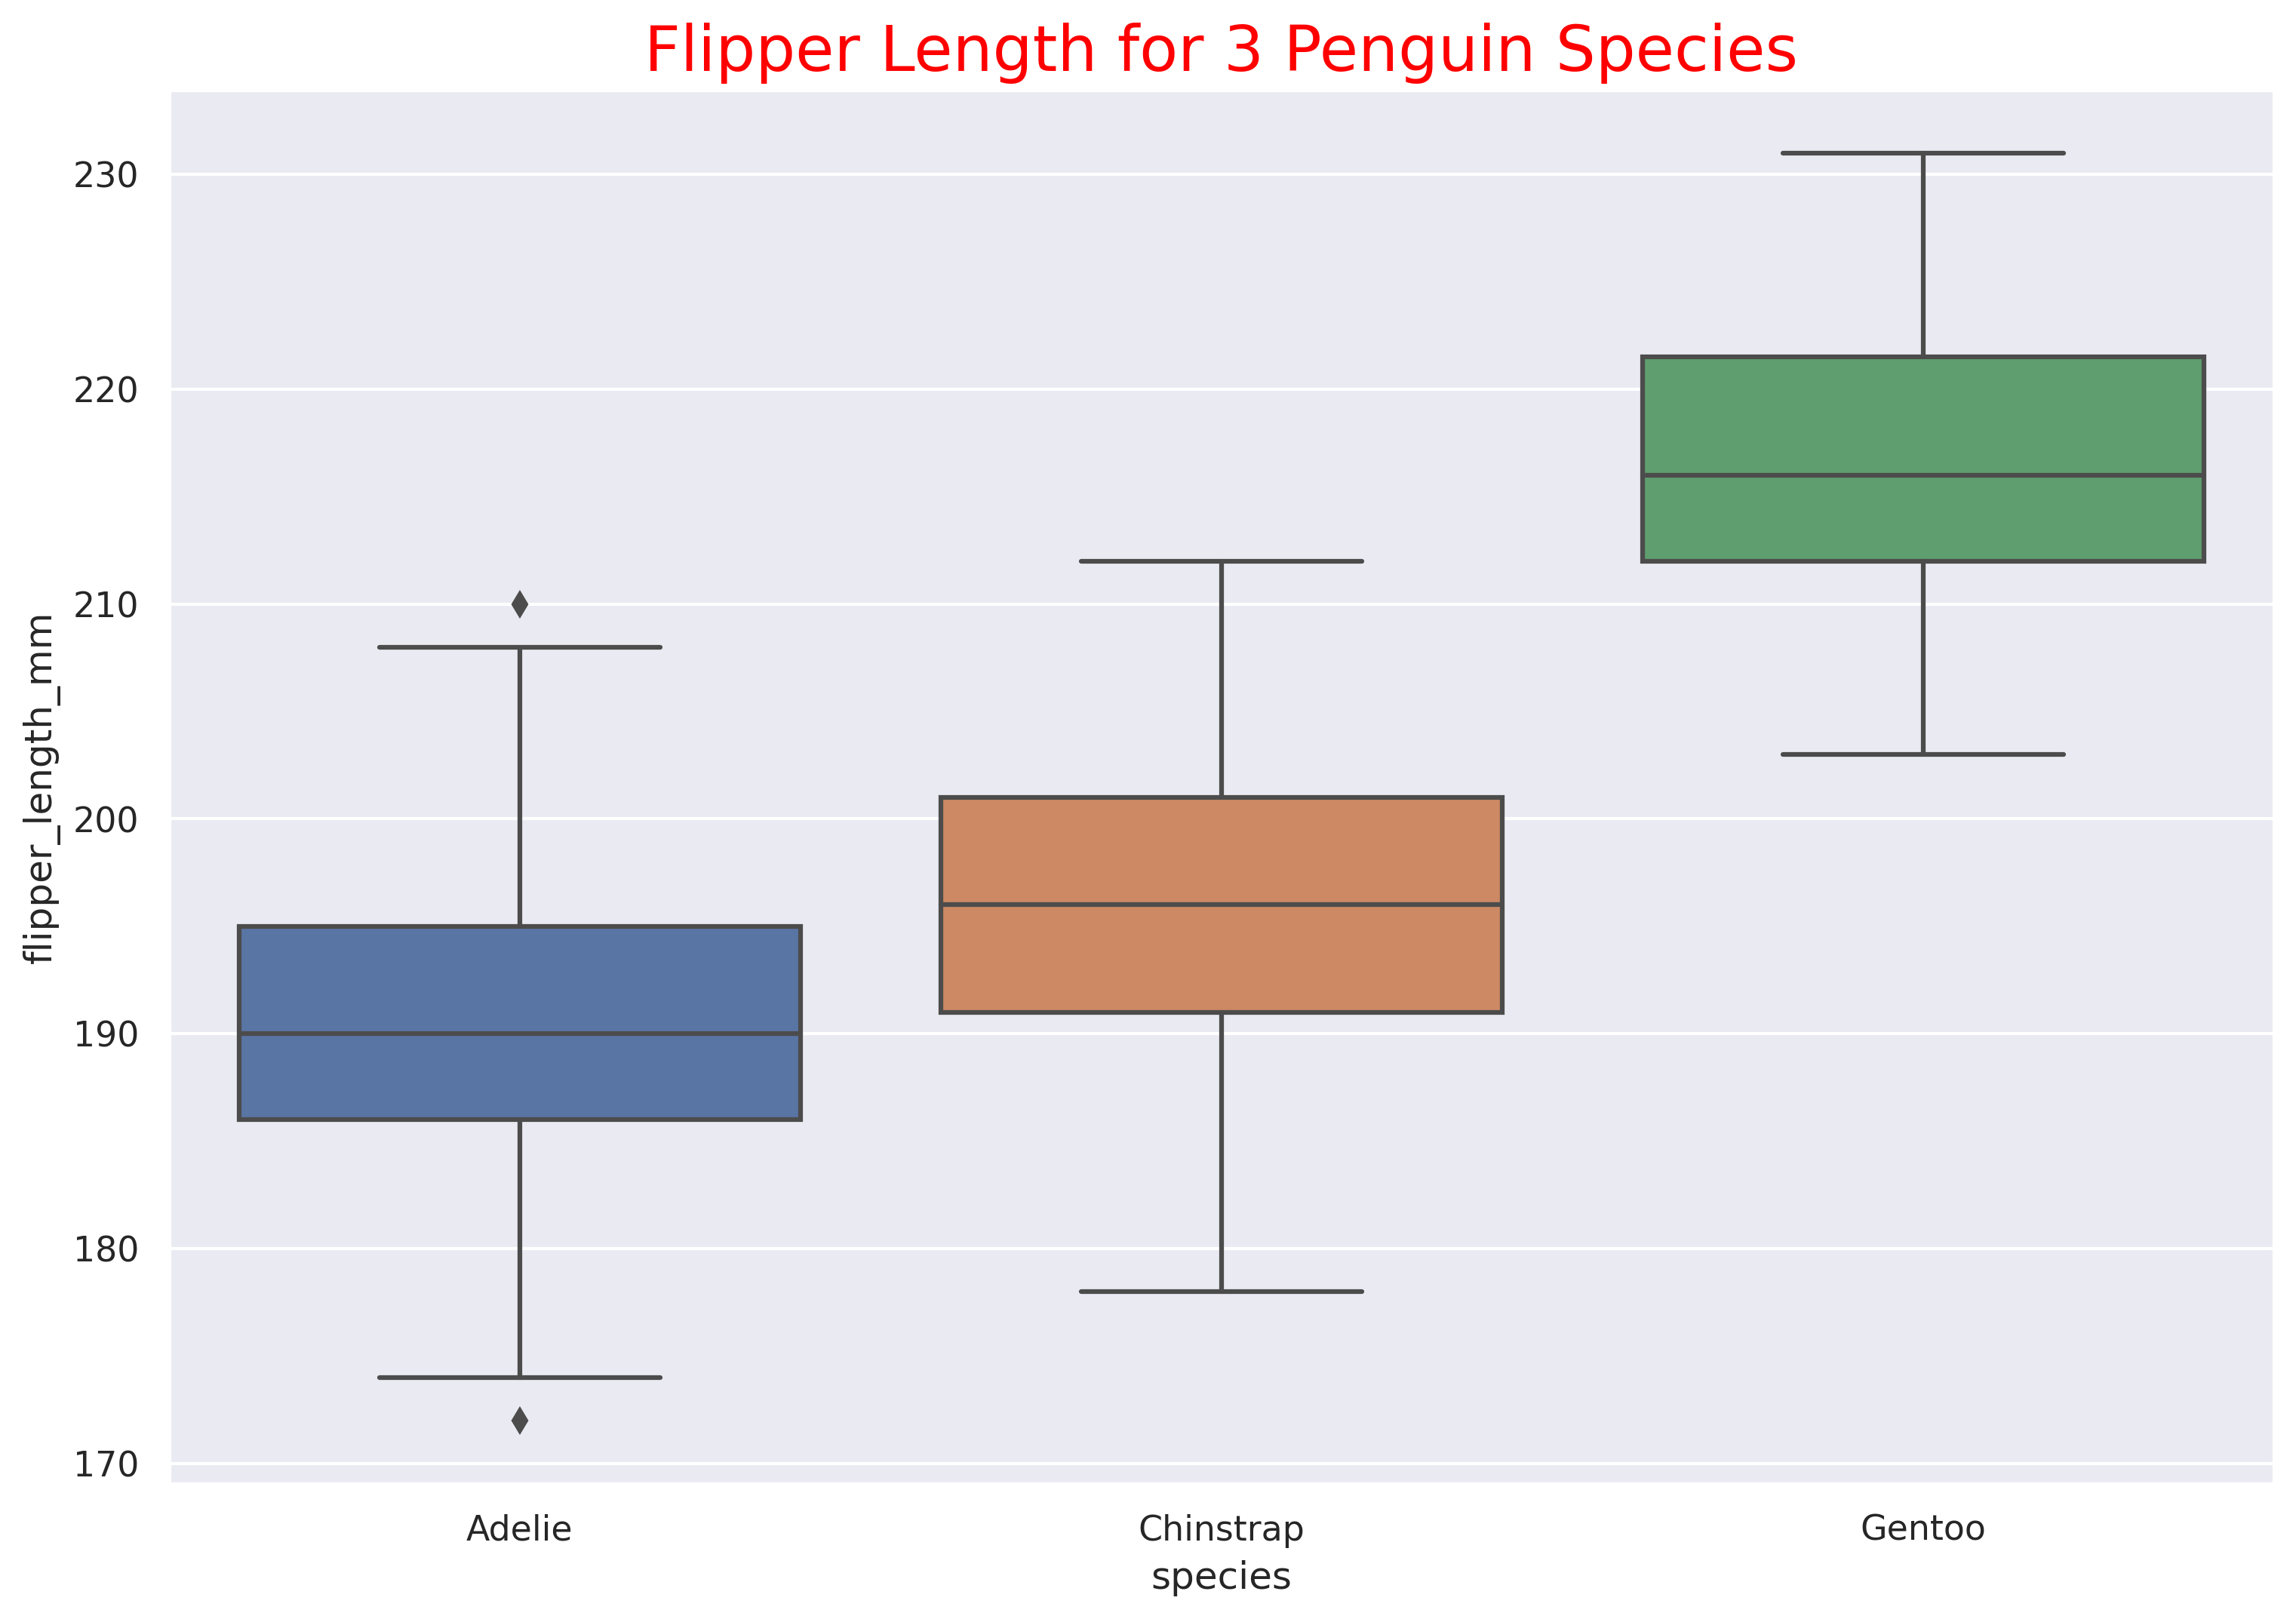

In [25]:
sns.boxplot(x = "species", y = "flipper_length_mm", data =df)
plt.title("Flipper Length for 3 Penguin Species", size=20, color="red")

We can use the hue parameter to see a boxplot of flipper lengths of species by sex.

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species')

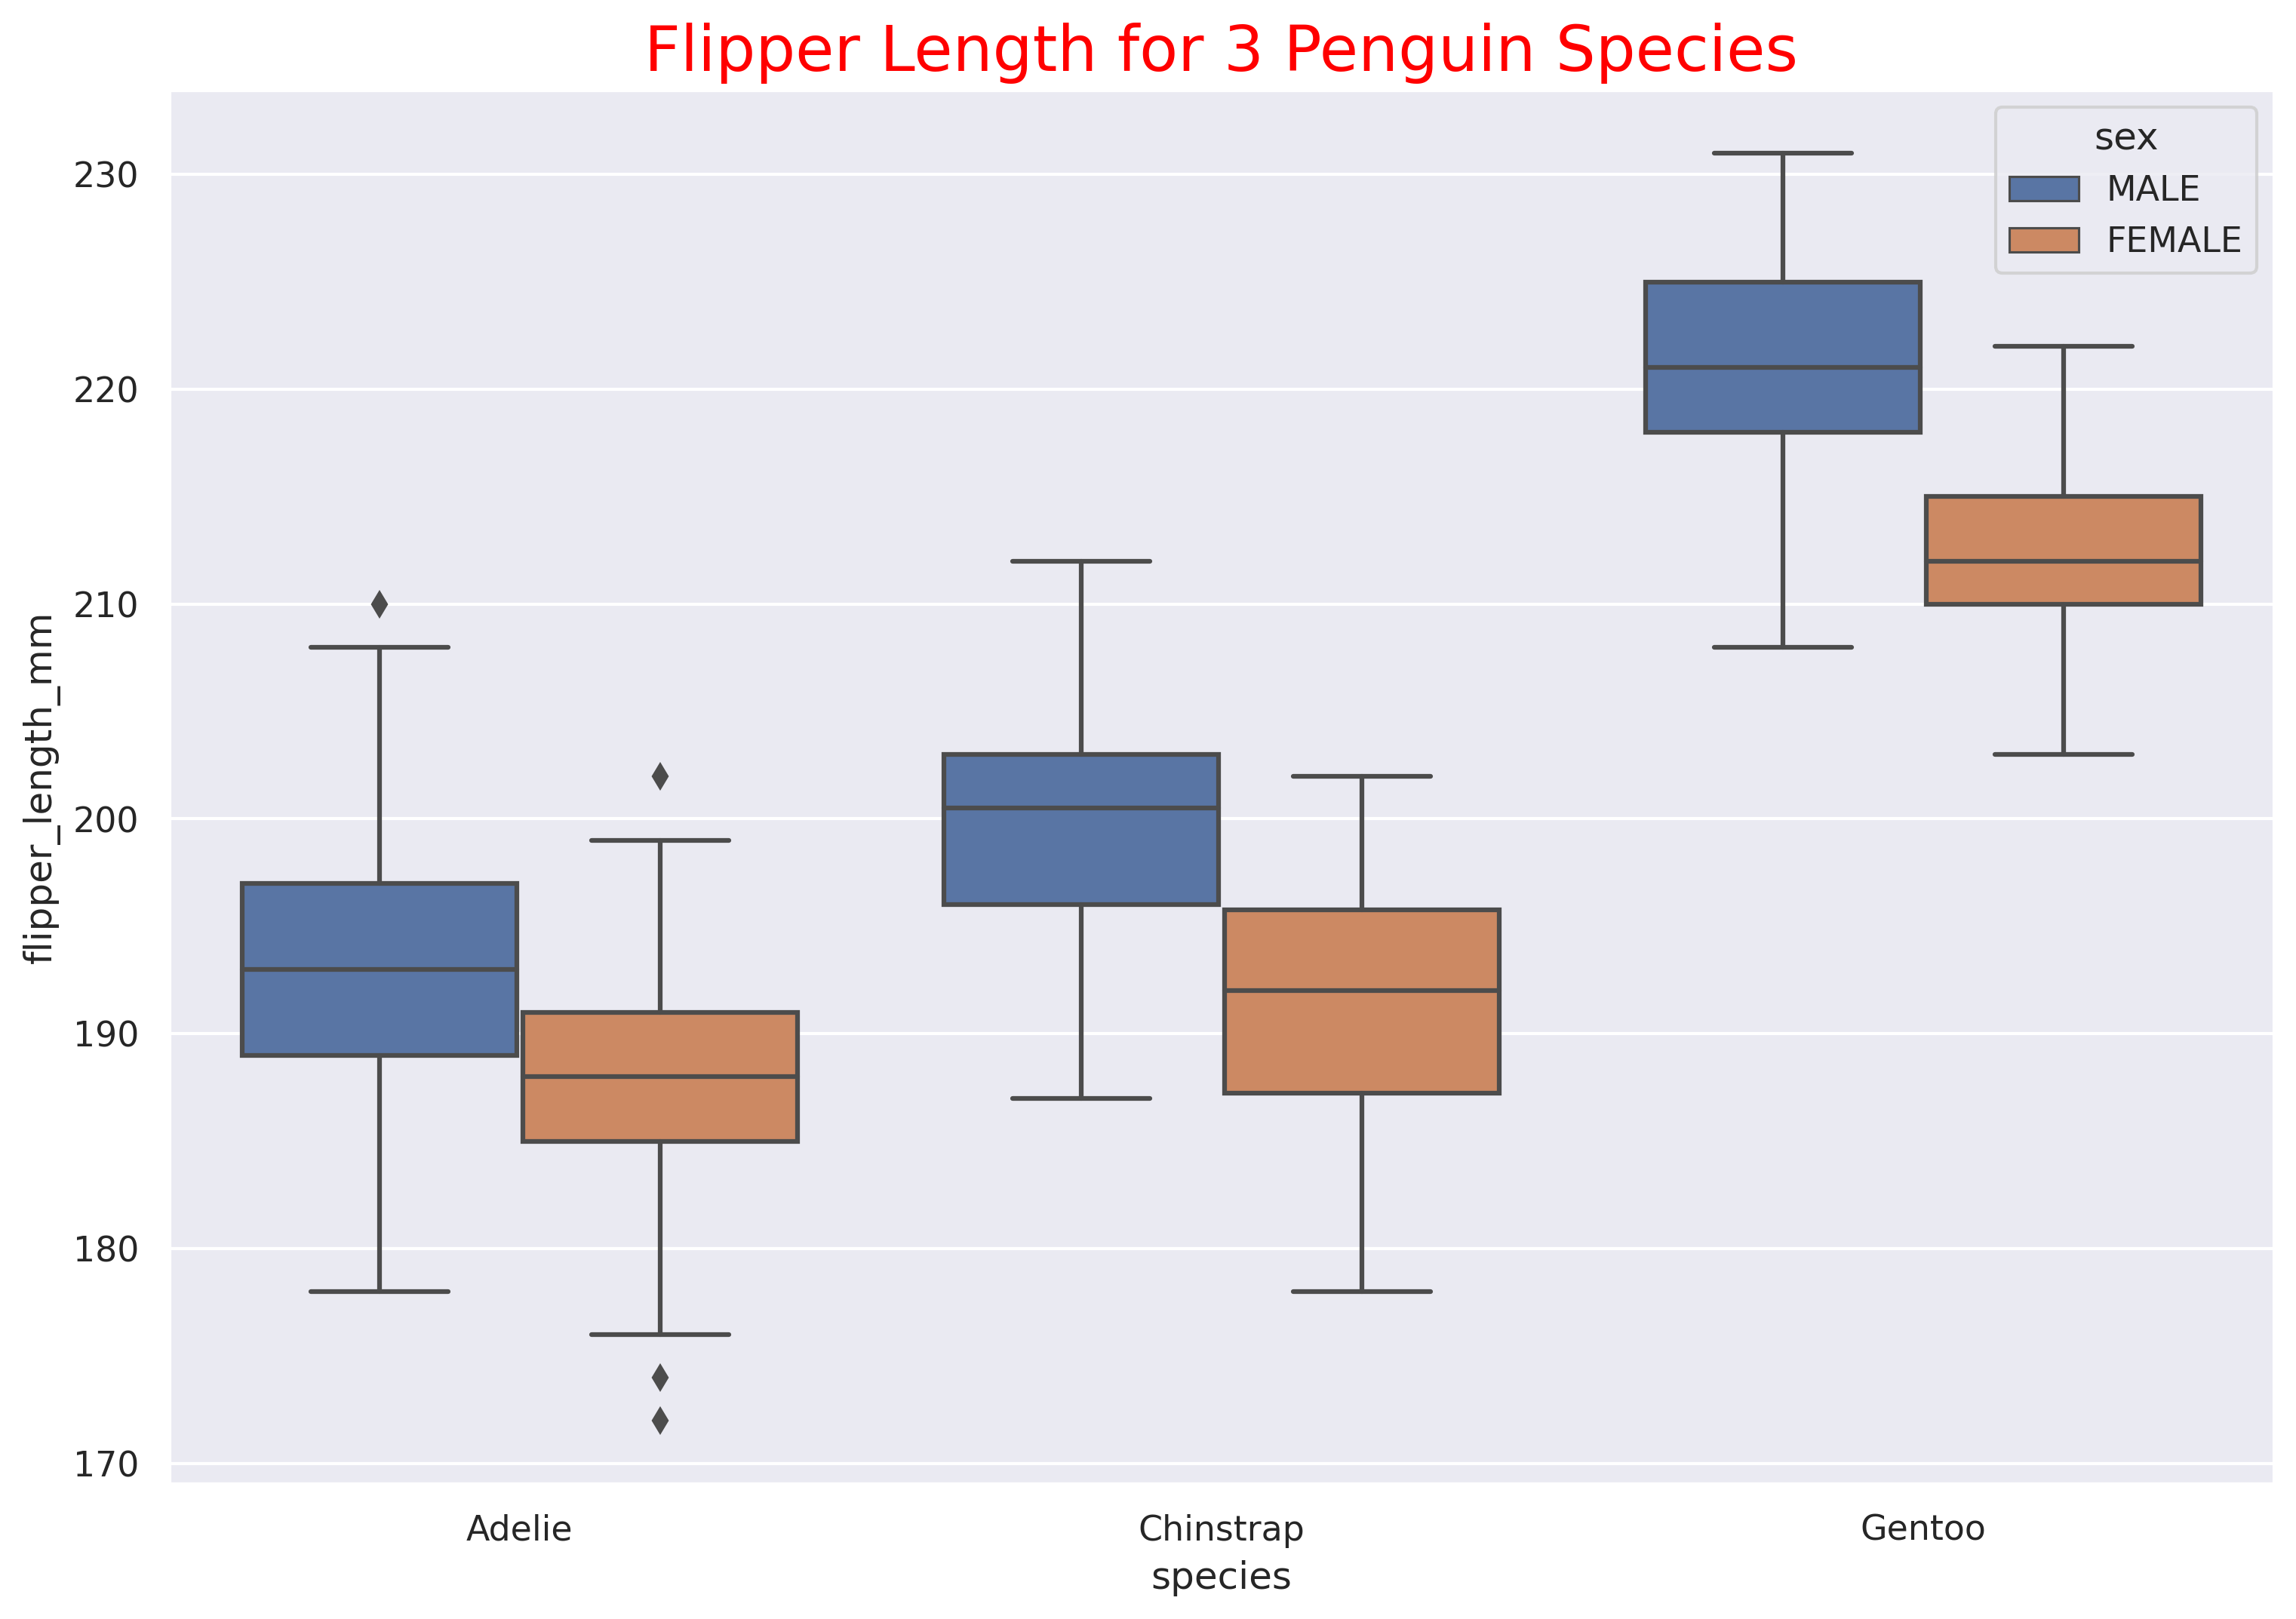

In [26]:
sns.boxplot(x = "species", y = "flipper_length_mm", data =df, hue = 'sex')
plt.title("Flipper Length for 3 Penguin Species", size=20, color="red")

## **Violin Plot**

You can think of the violin plot as a box plot. This plot is used to compare the distribution of numerical values among categorical variables. Let’s see the violin plot of flipper length.

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species')

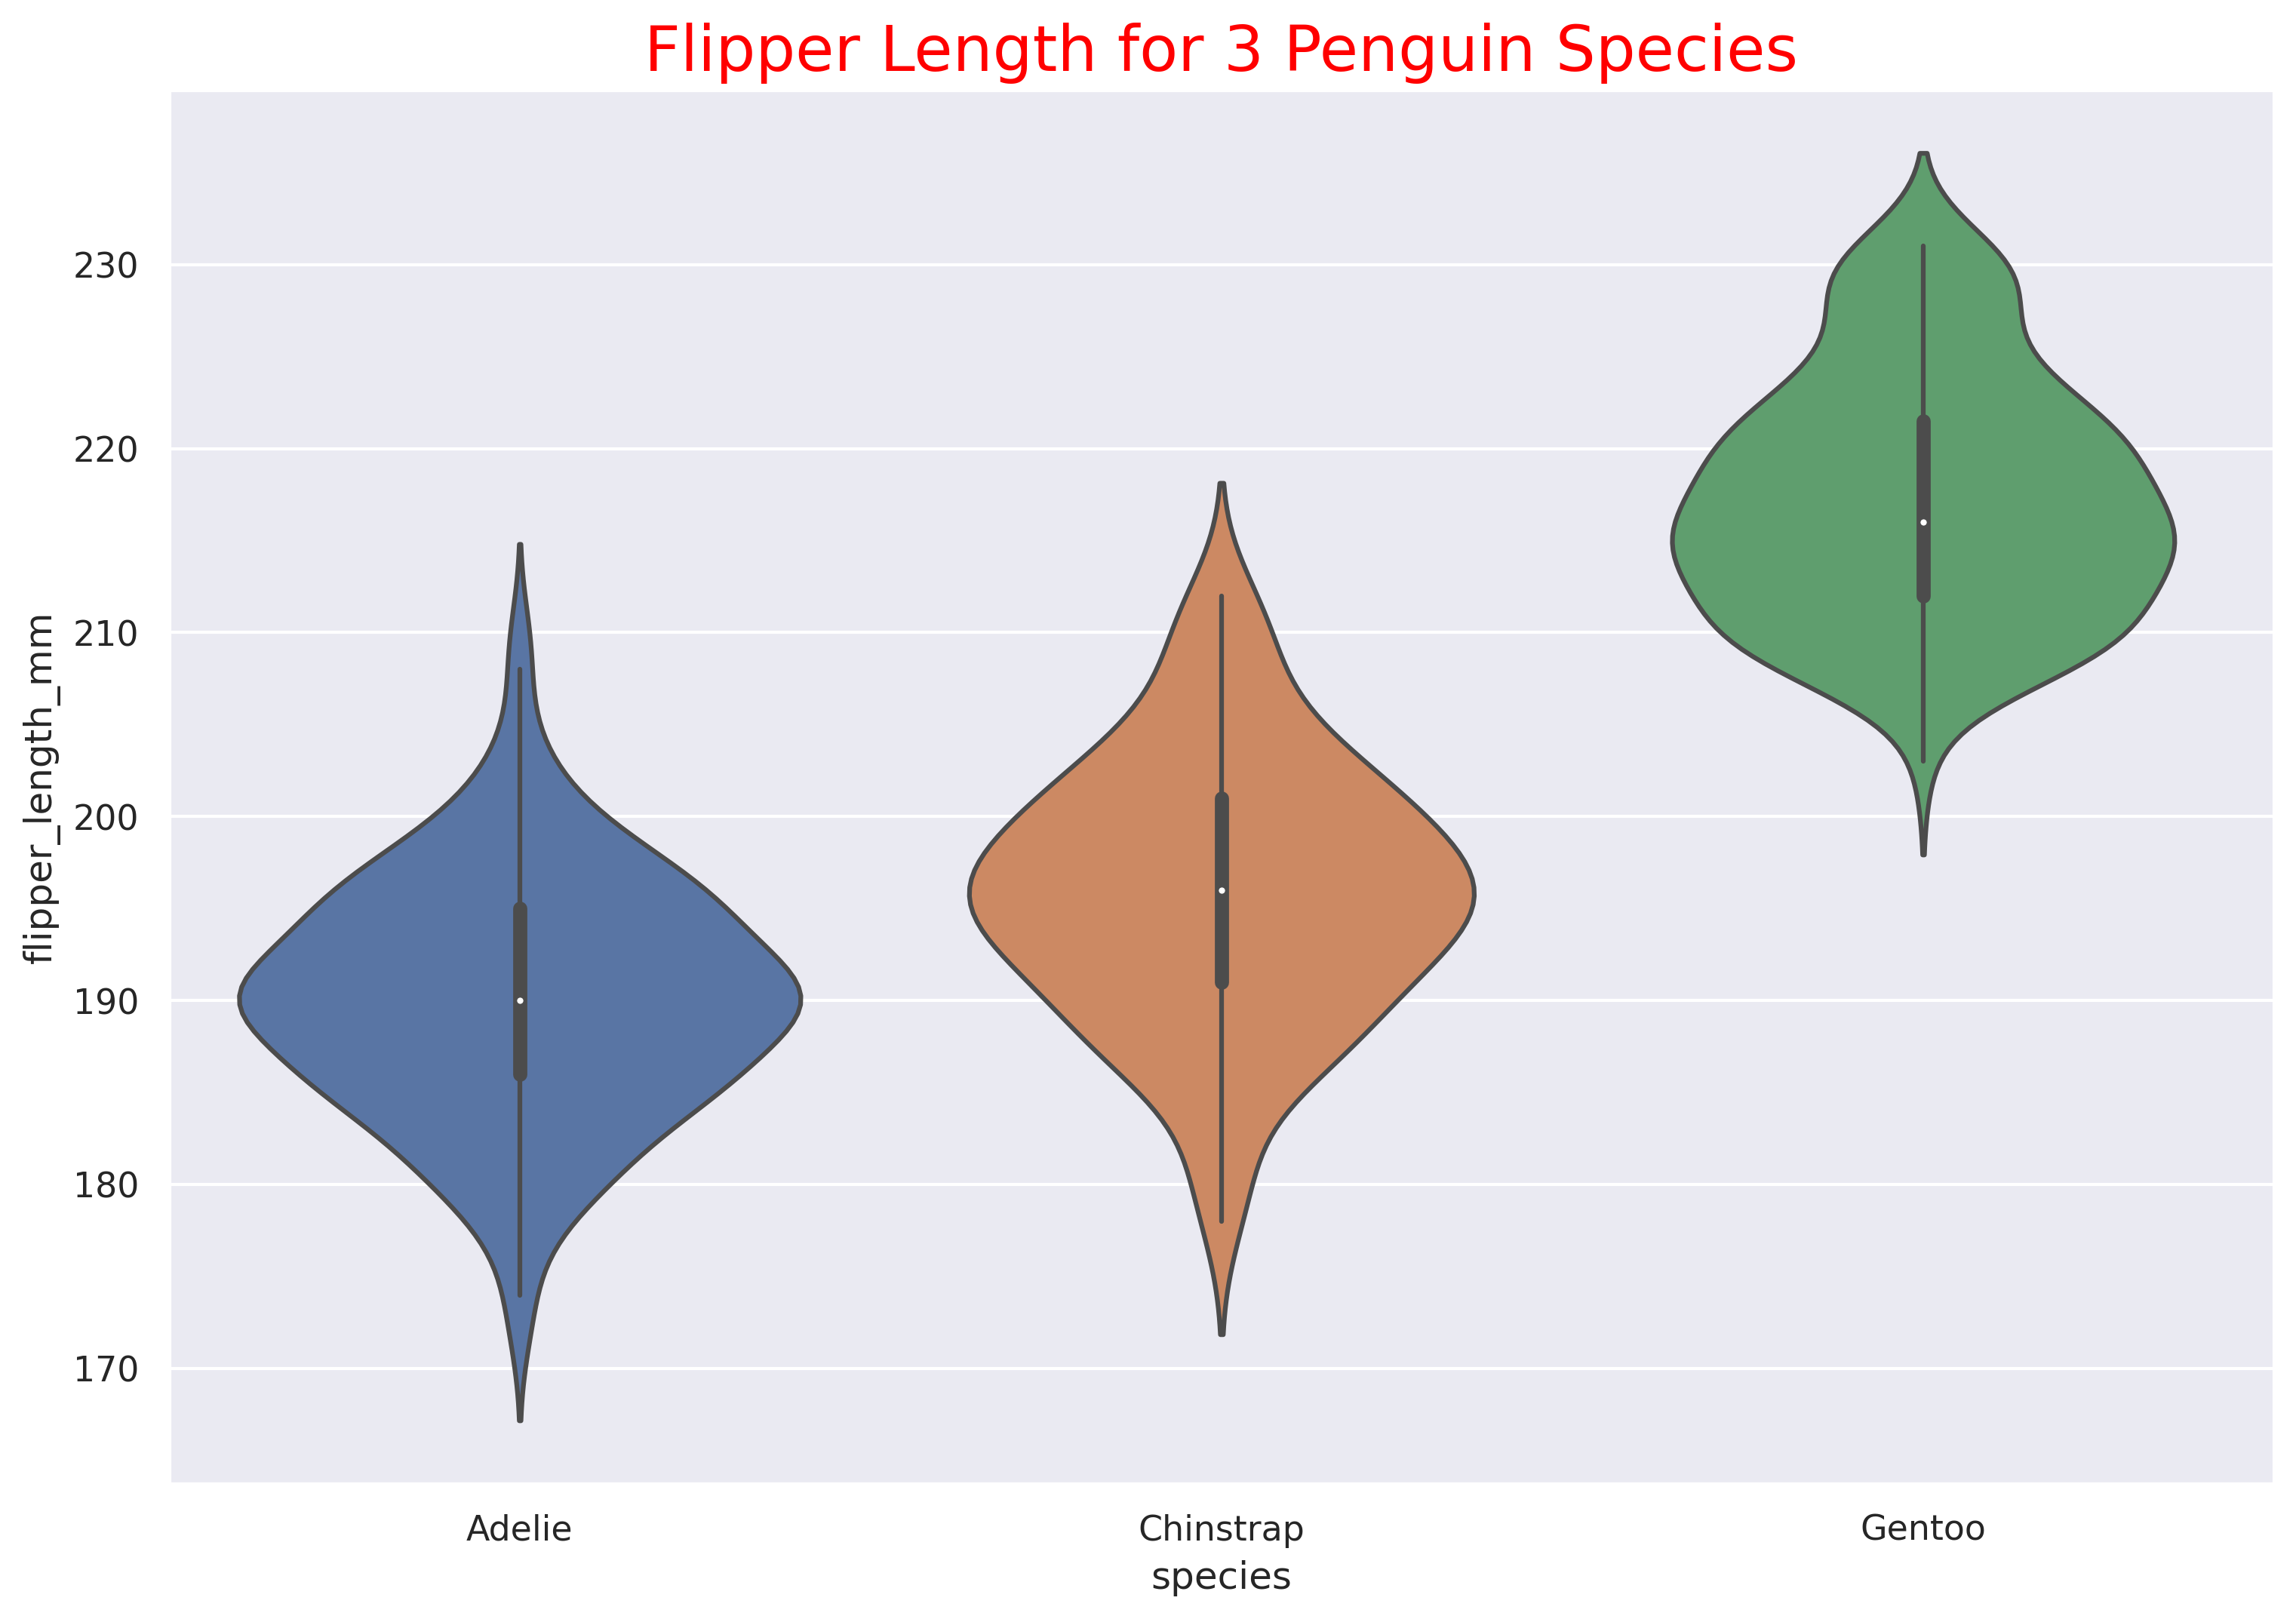

In [27]:
sns.violinplot(x = "species", y = "flipper_length_mm", data = df)
plt.title("Flipper Length for 3 Penguin Species", size=20, color="red")

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species by Sex')

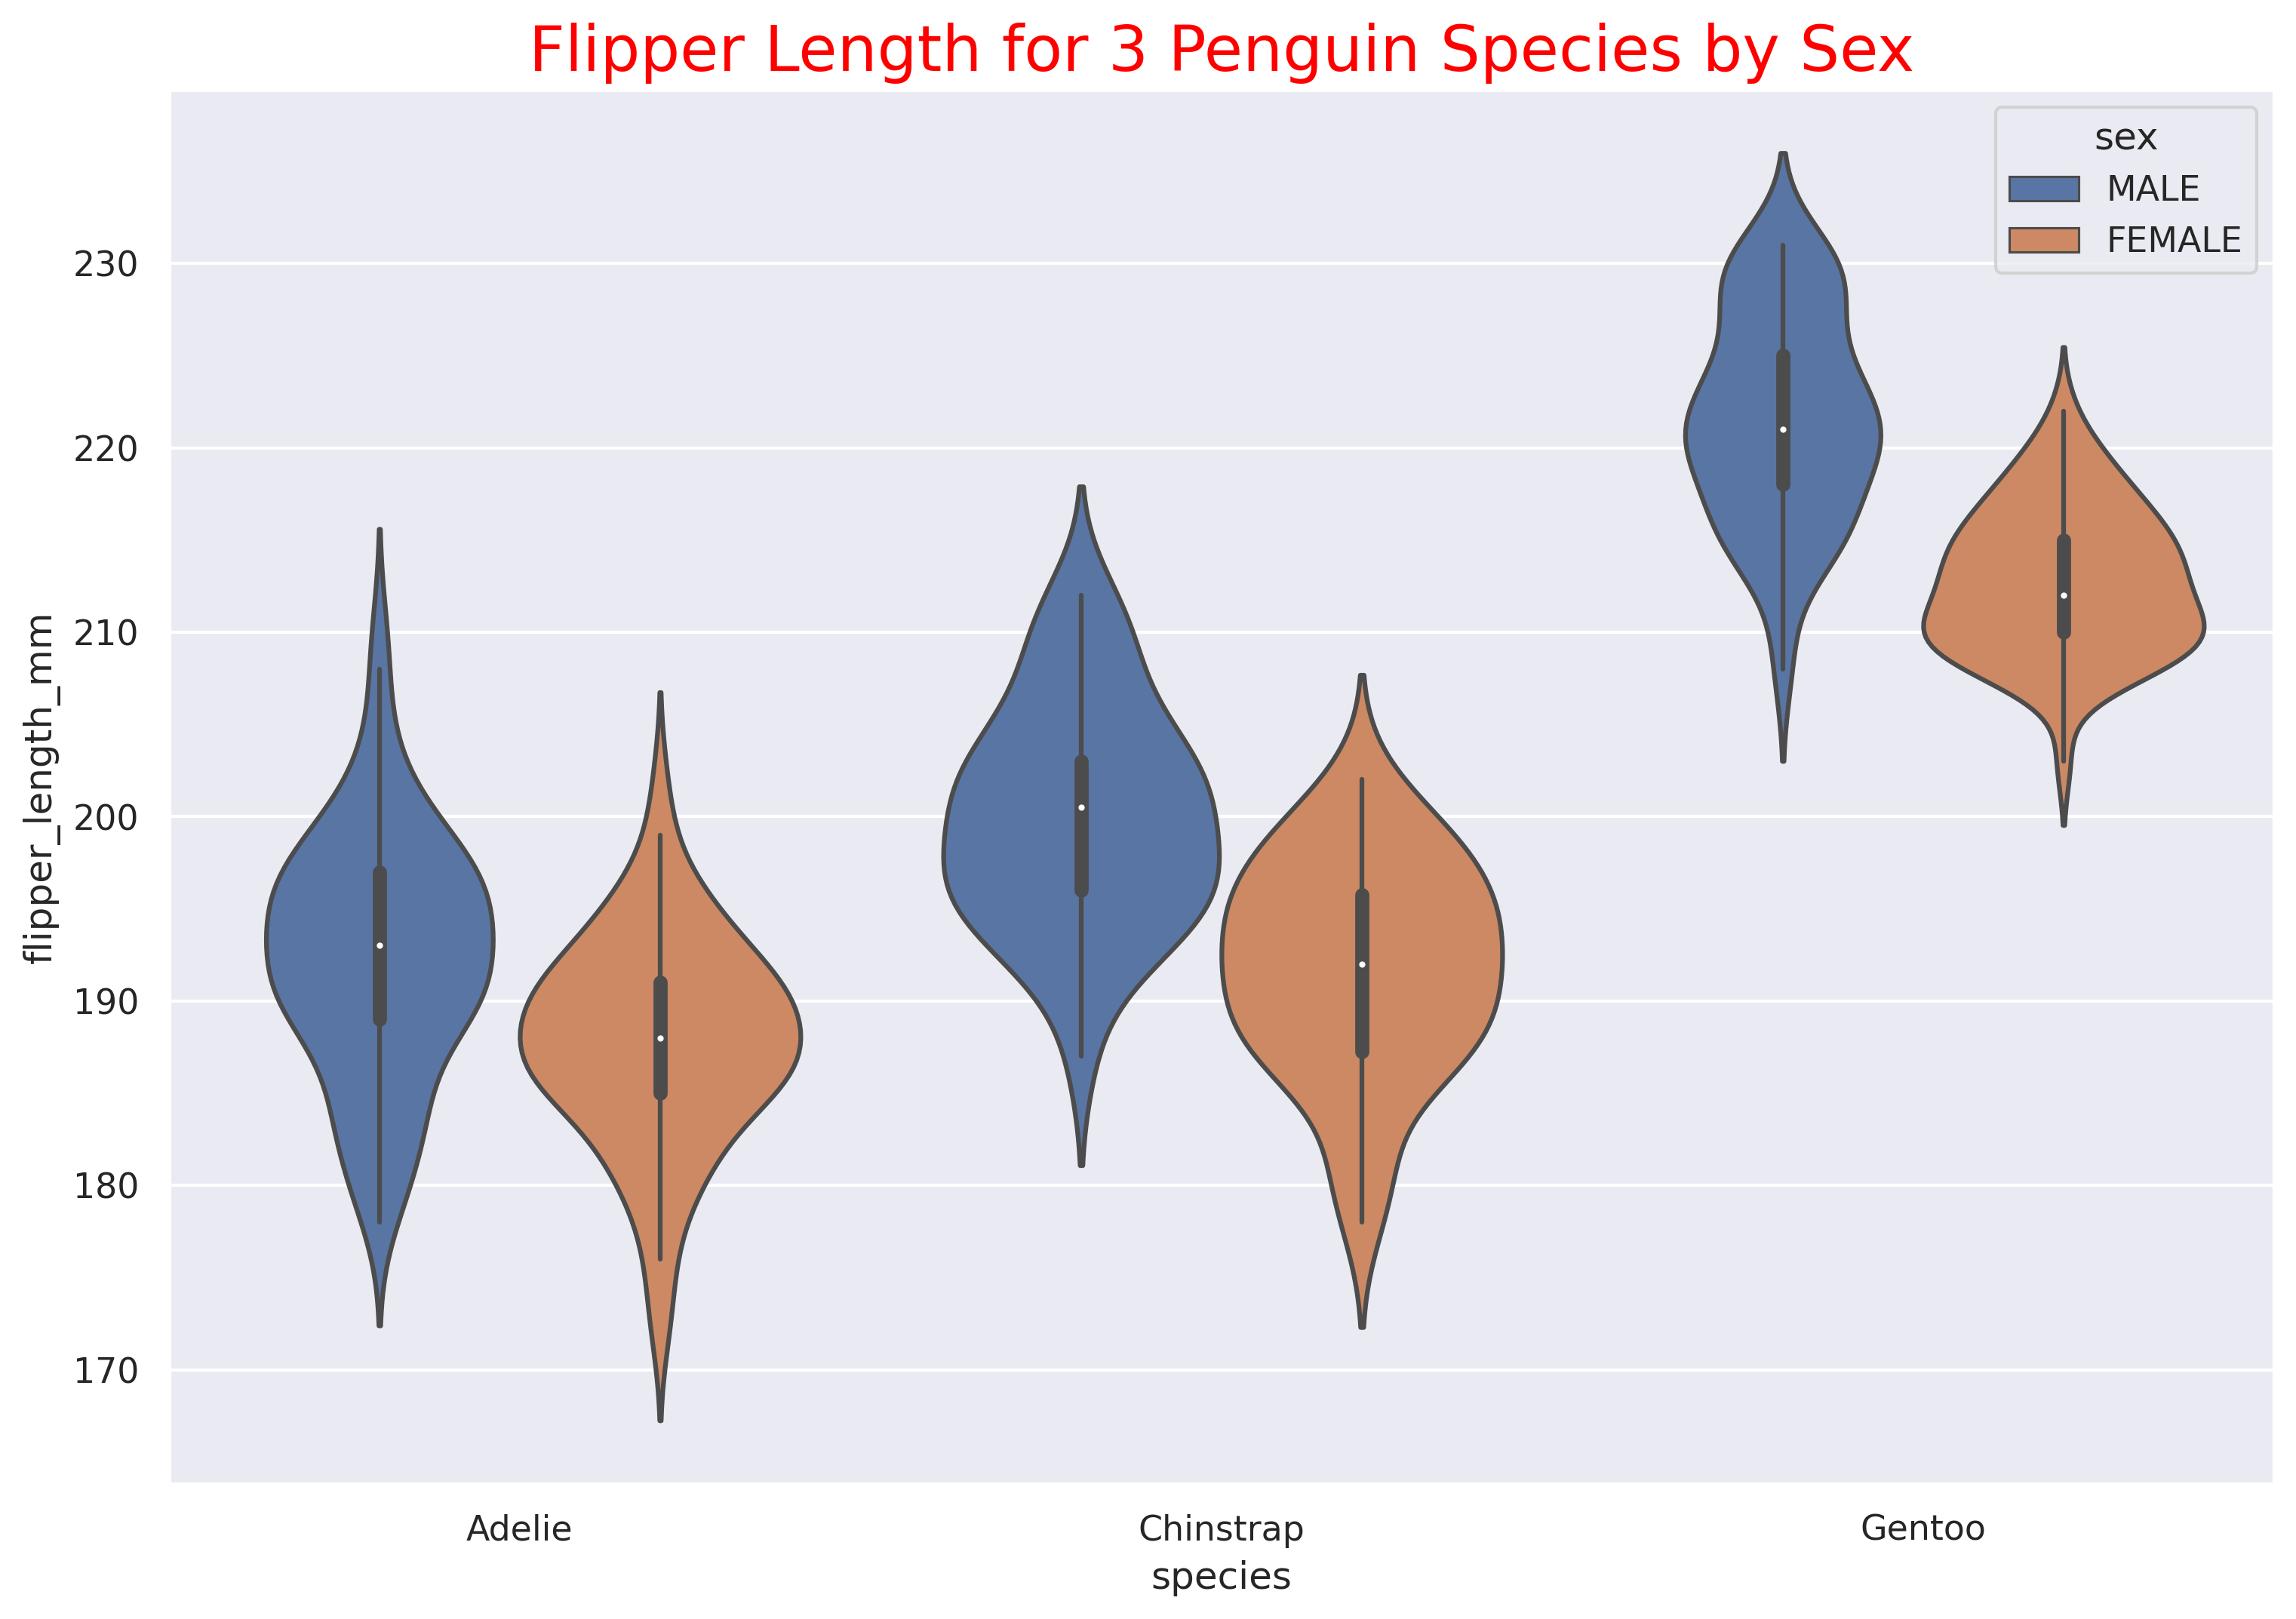

In [28]:
sns.violinplot(x = "species", y = "flipper_length_mm", data = df, hue = "sex")
plt.title("Flipper Length for 3 Penguin Species by Sex", size=20, color="red")

## **Facet Plot**

We can use a facet grid to see a grid graph of the different subsets in your dataset. For example, let us draw the histogram plot of the penguins’ flipper length according to the island and sex variables. Let’s assign column and row variables to add more subplots to the figure.

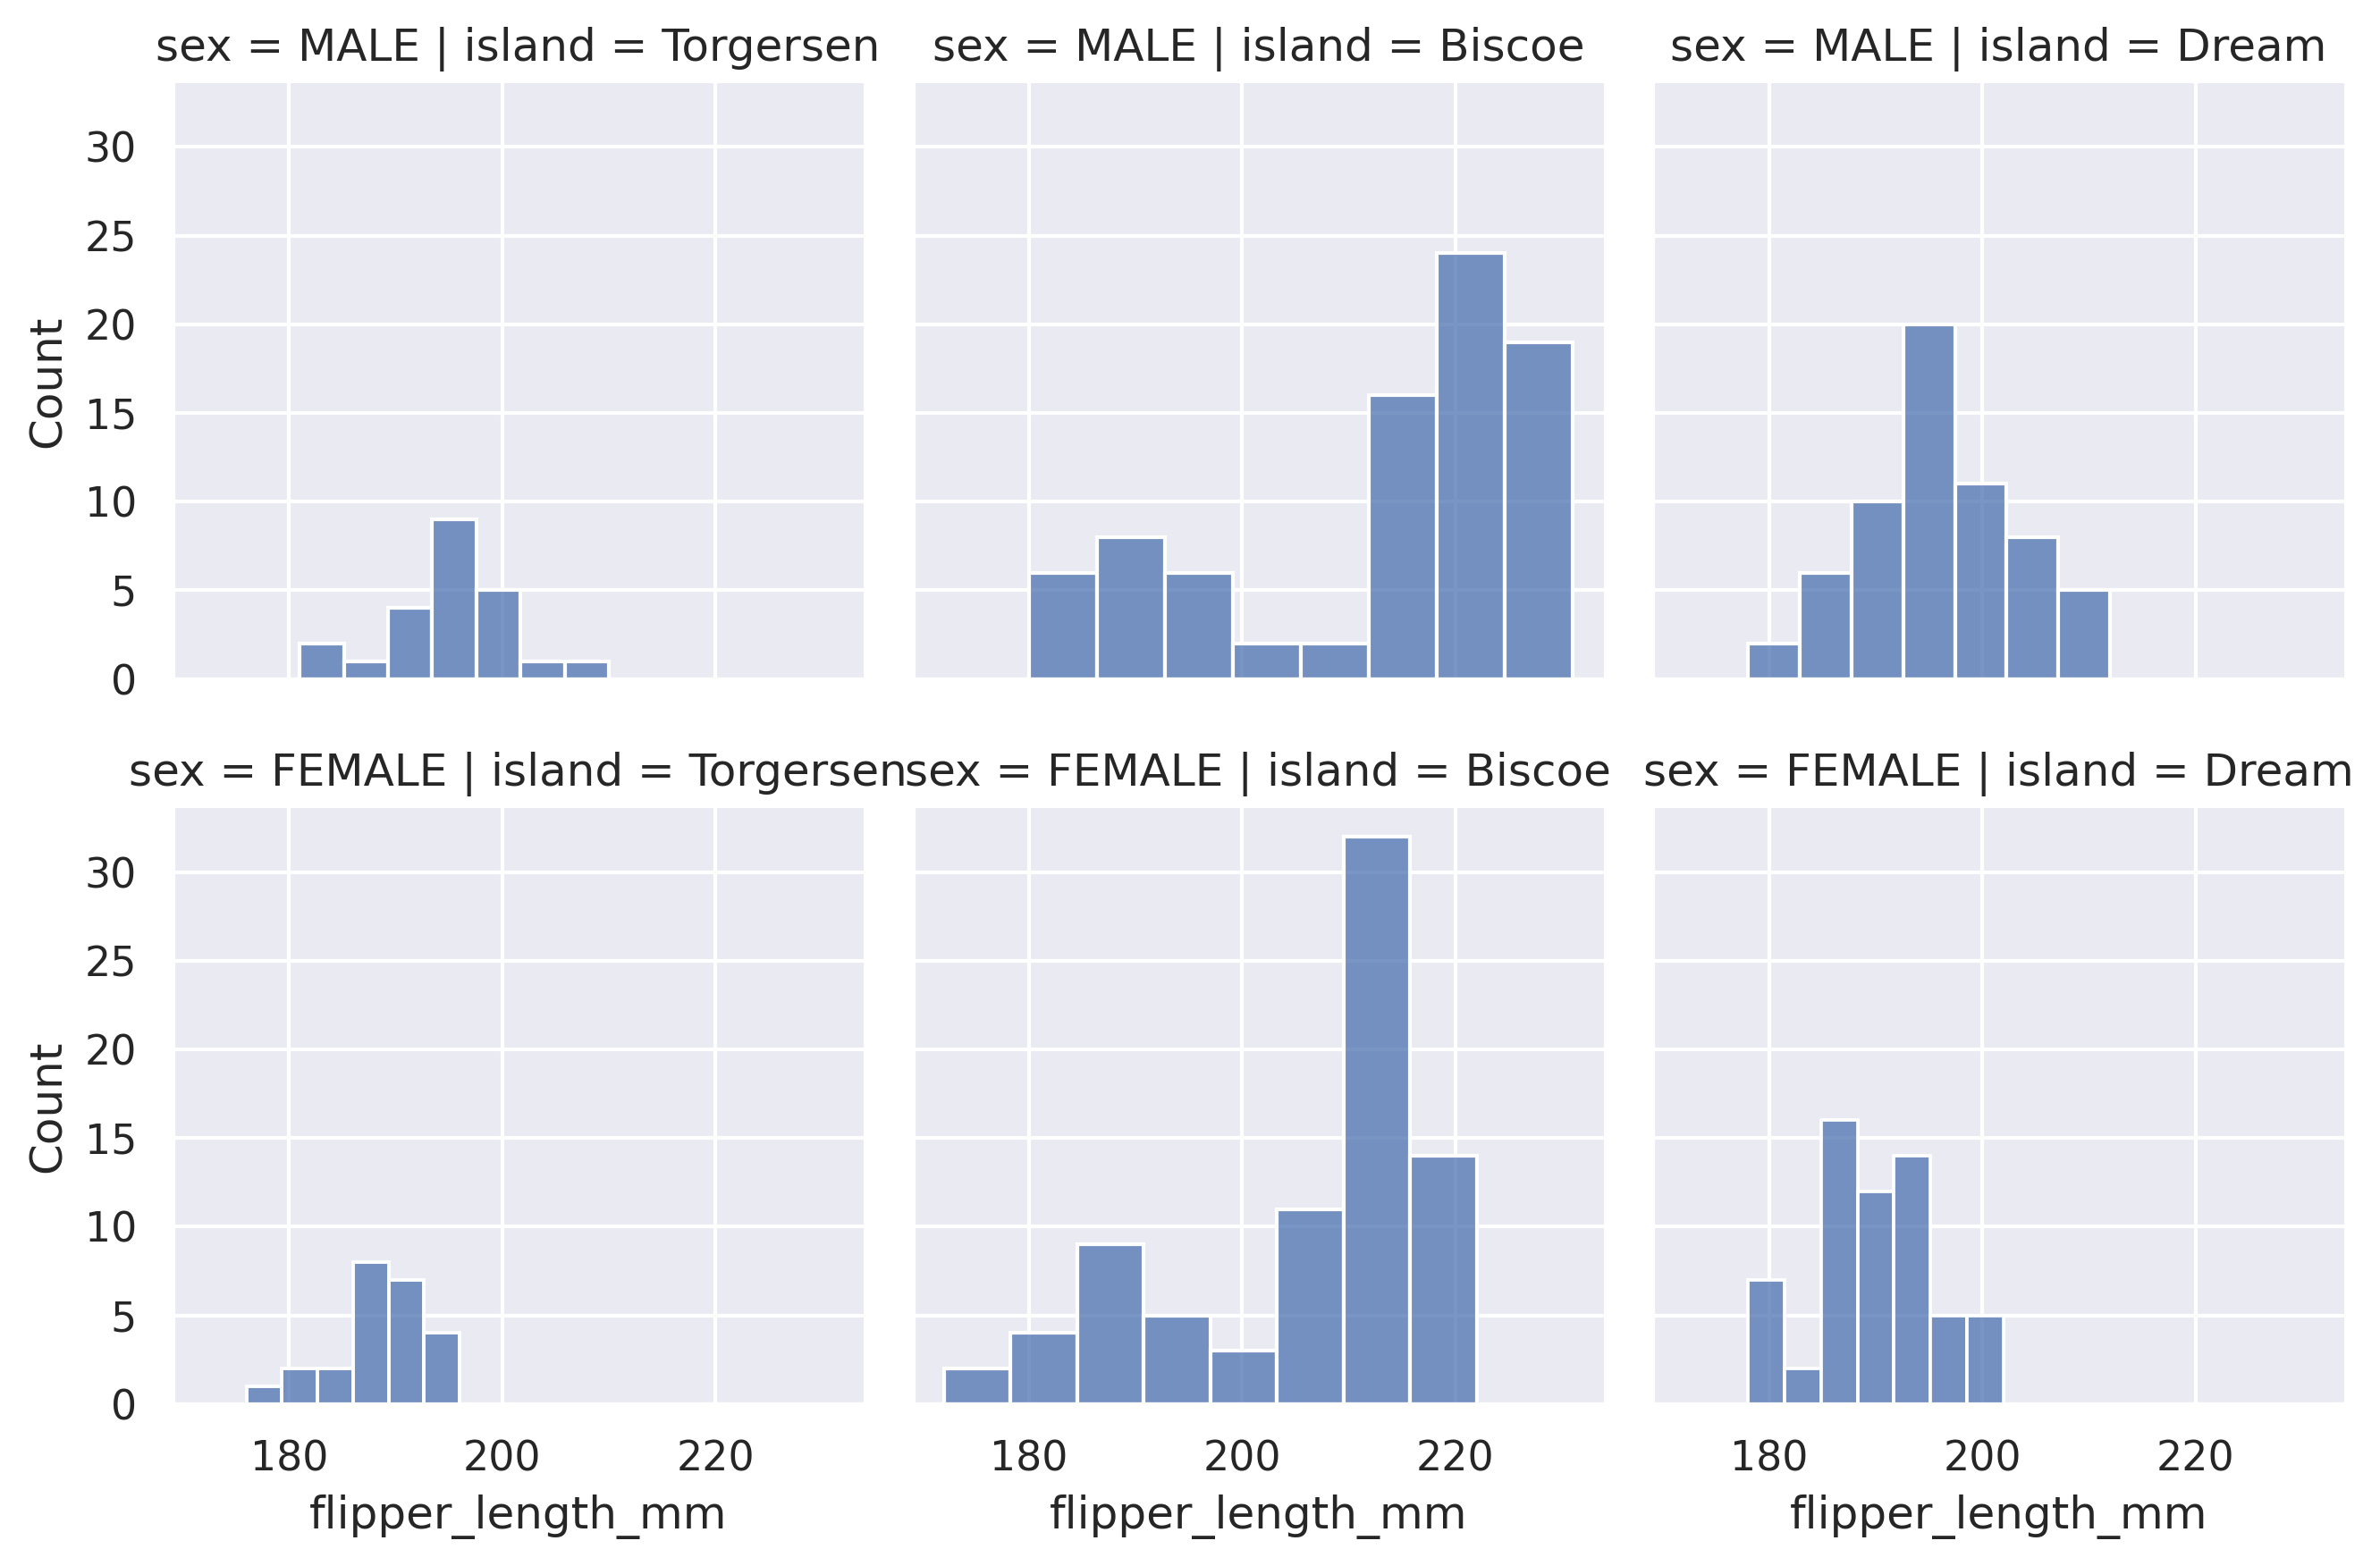

In [30]:
sns.FacetGrid(df, col="island", row="sex").map(sns.histplot, "flipper_length_mm")

## **Pair Plot**

We can use the pairplot method to see the pair relations of the variables. This function creates cross-plots of each numeric variable in the dataset. Let’s see the pairs of numerical variables according to penguin species in the dataset.

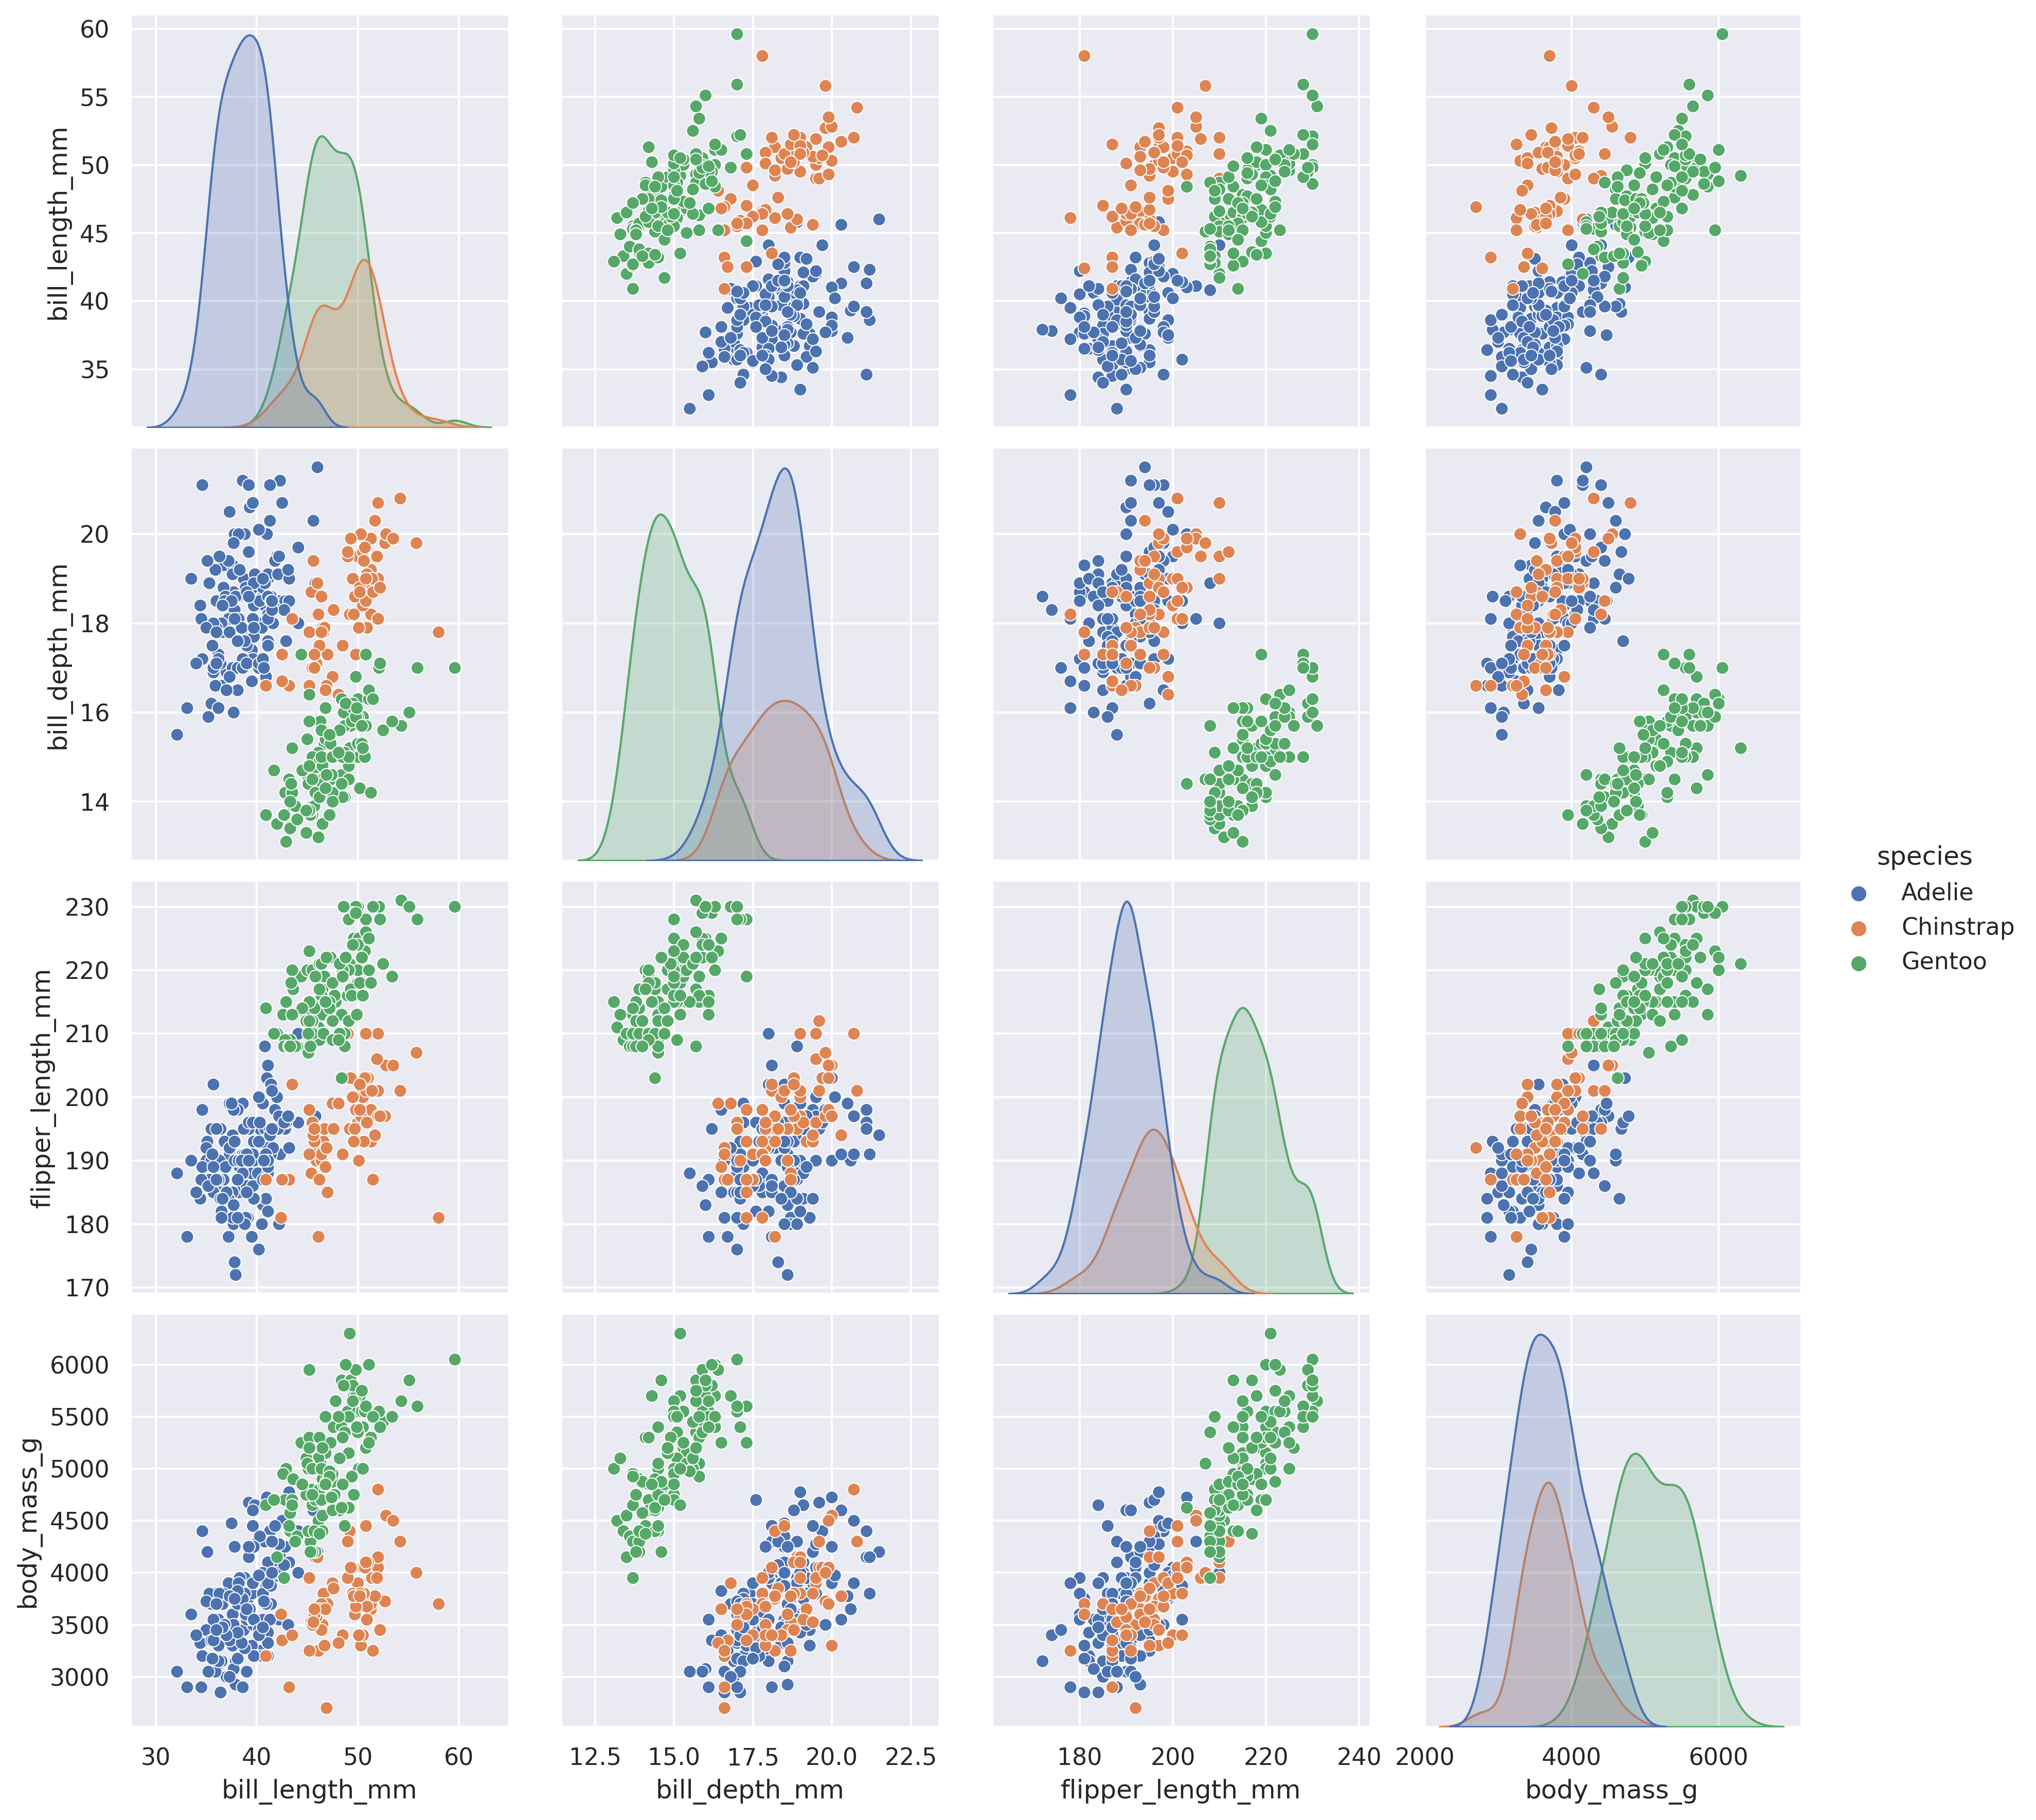

In [31]:
sns.pairplot(df, hue = "species", height=3)

We can use the `diag_kind` parameter to have histograms on the diagonal axis.

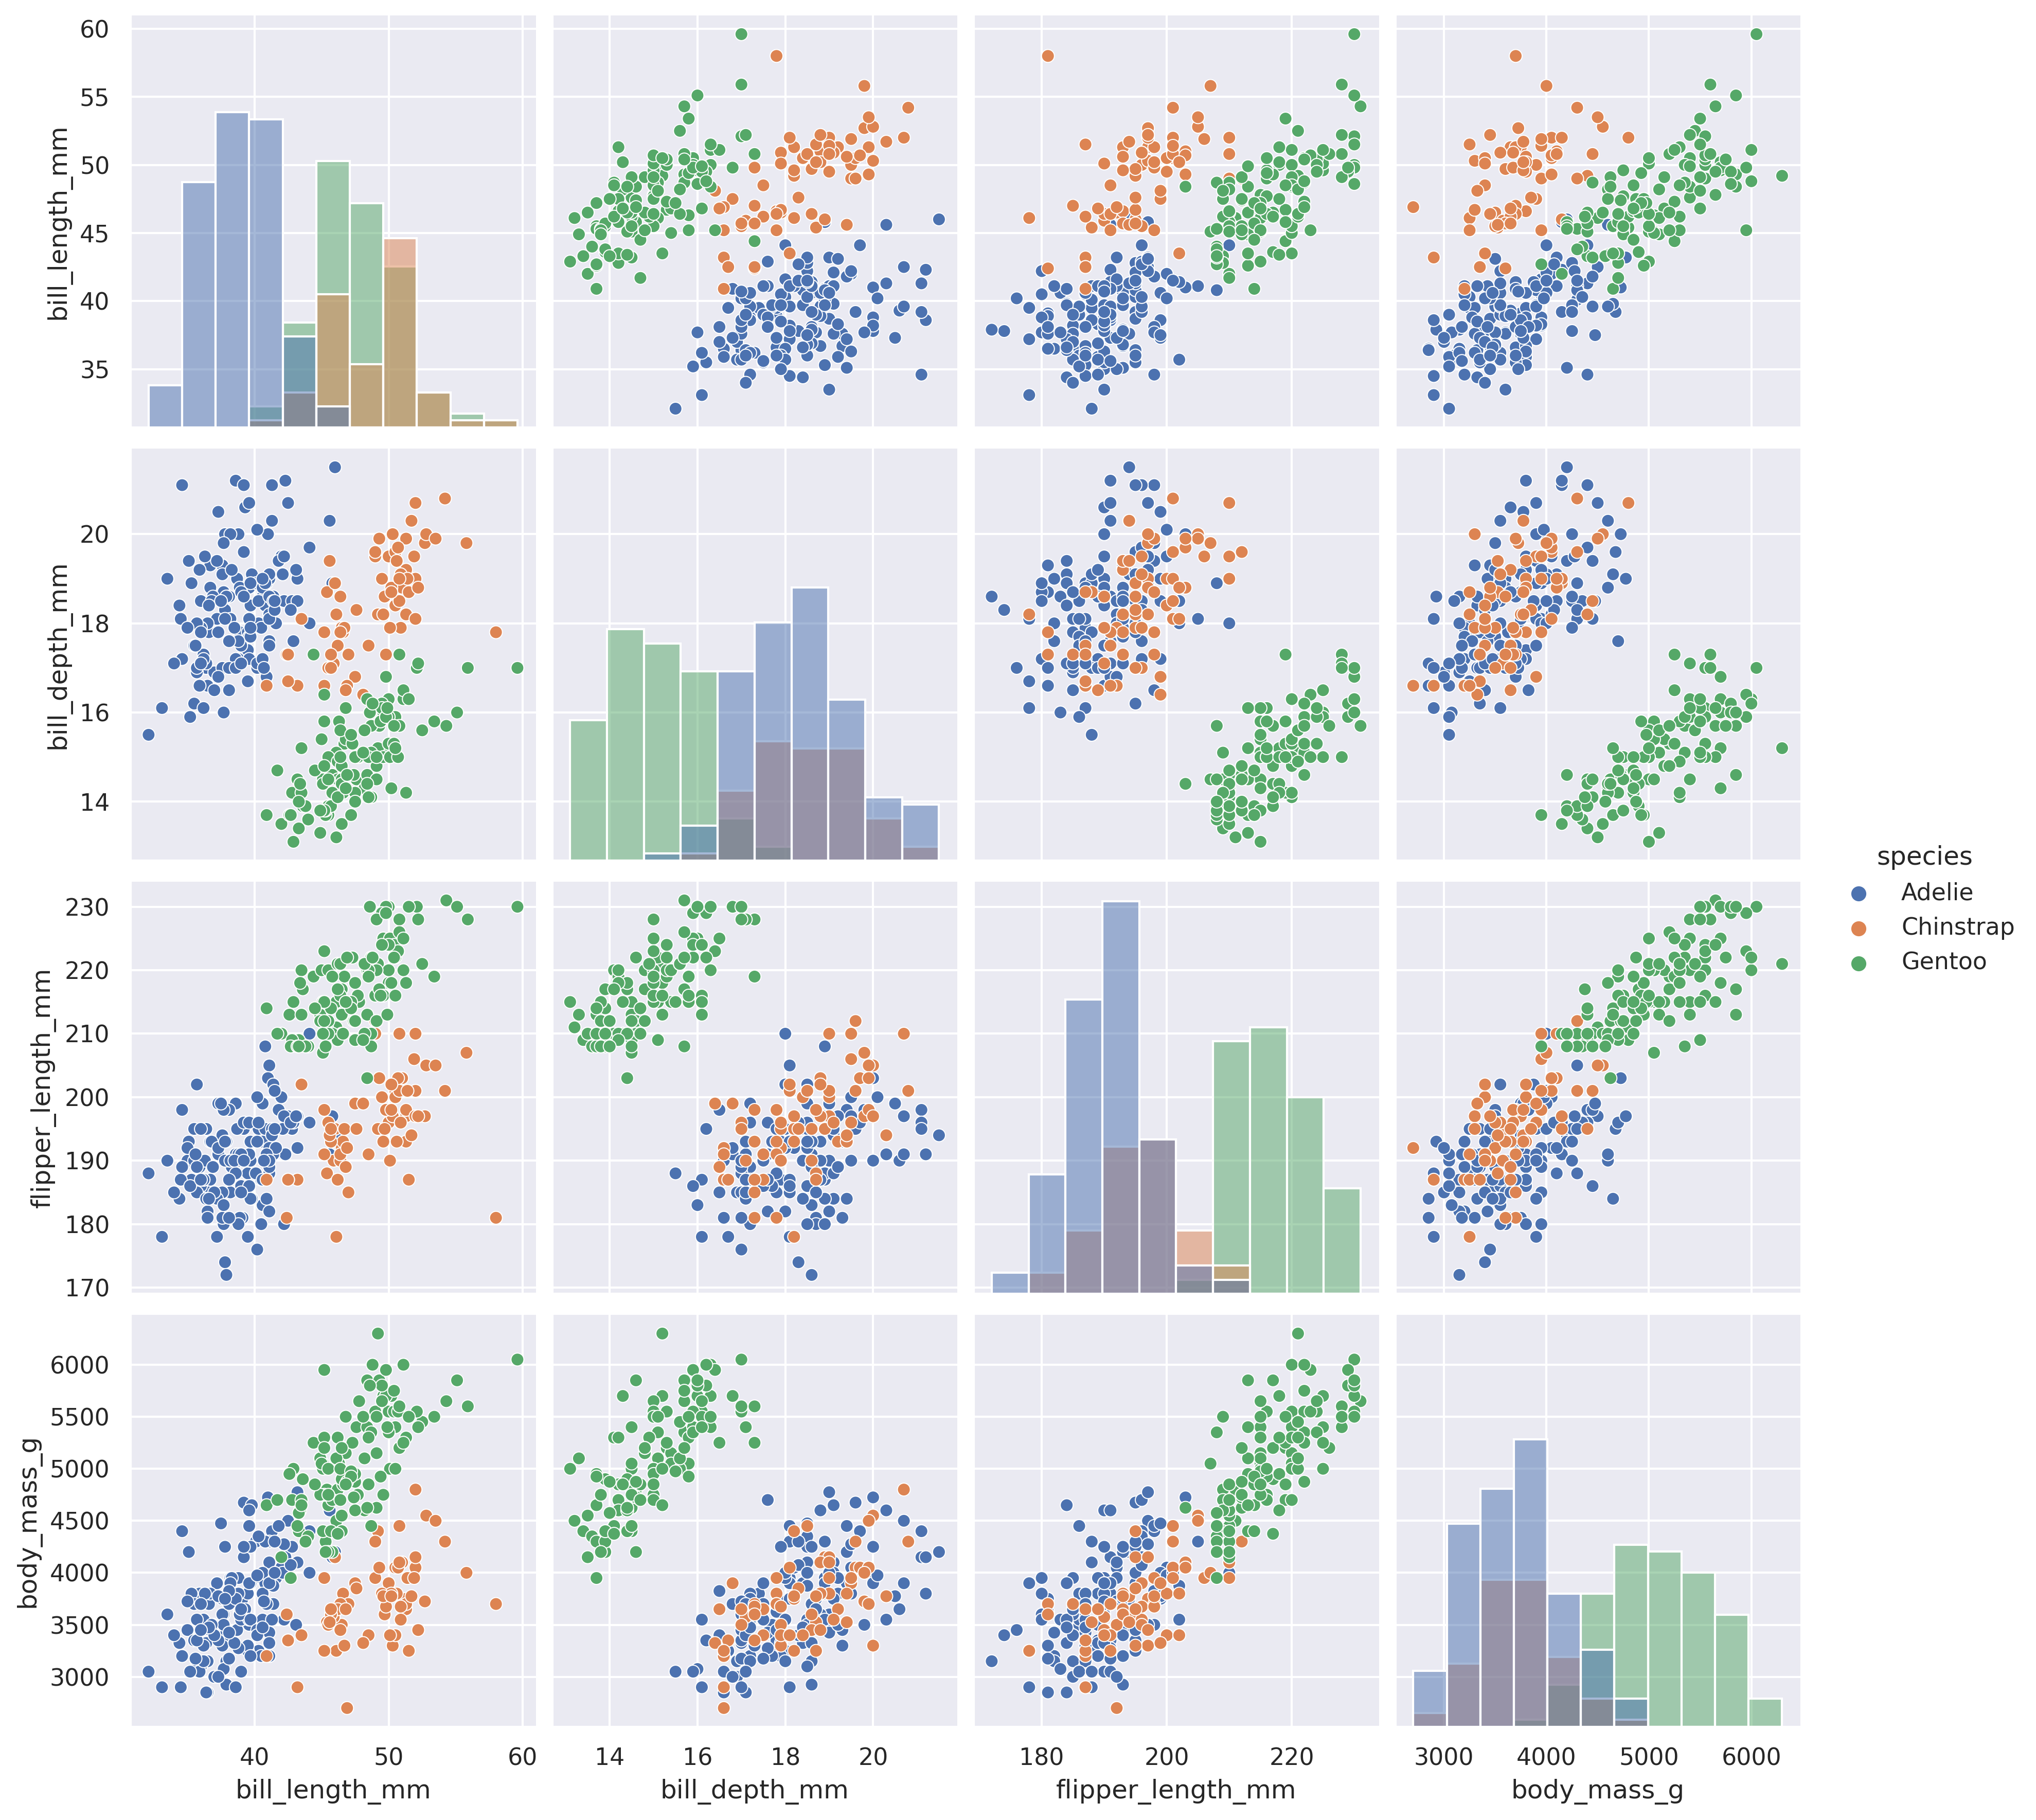

In [32]:
sns.pairplot(df, hue = "species", height=3, diag_kind="hist")

## **Heatmap**

* You can use this technique to see correlations between numerical variables. Let’s use the corr function to see thi with theannot parameter.

<Axes: >

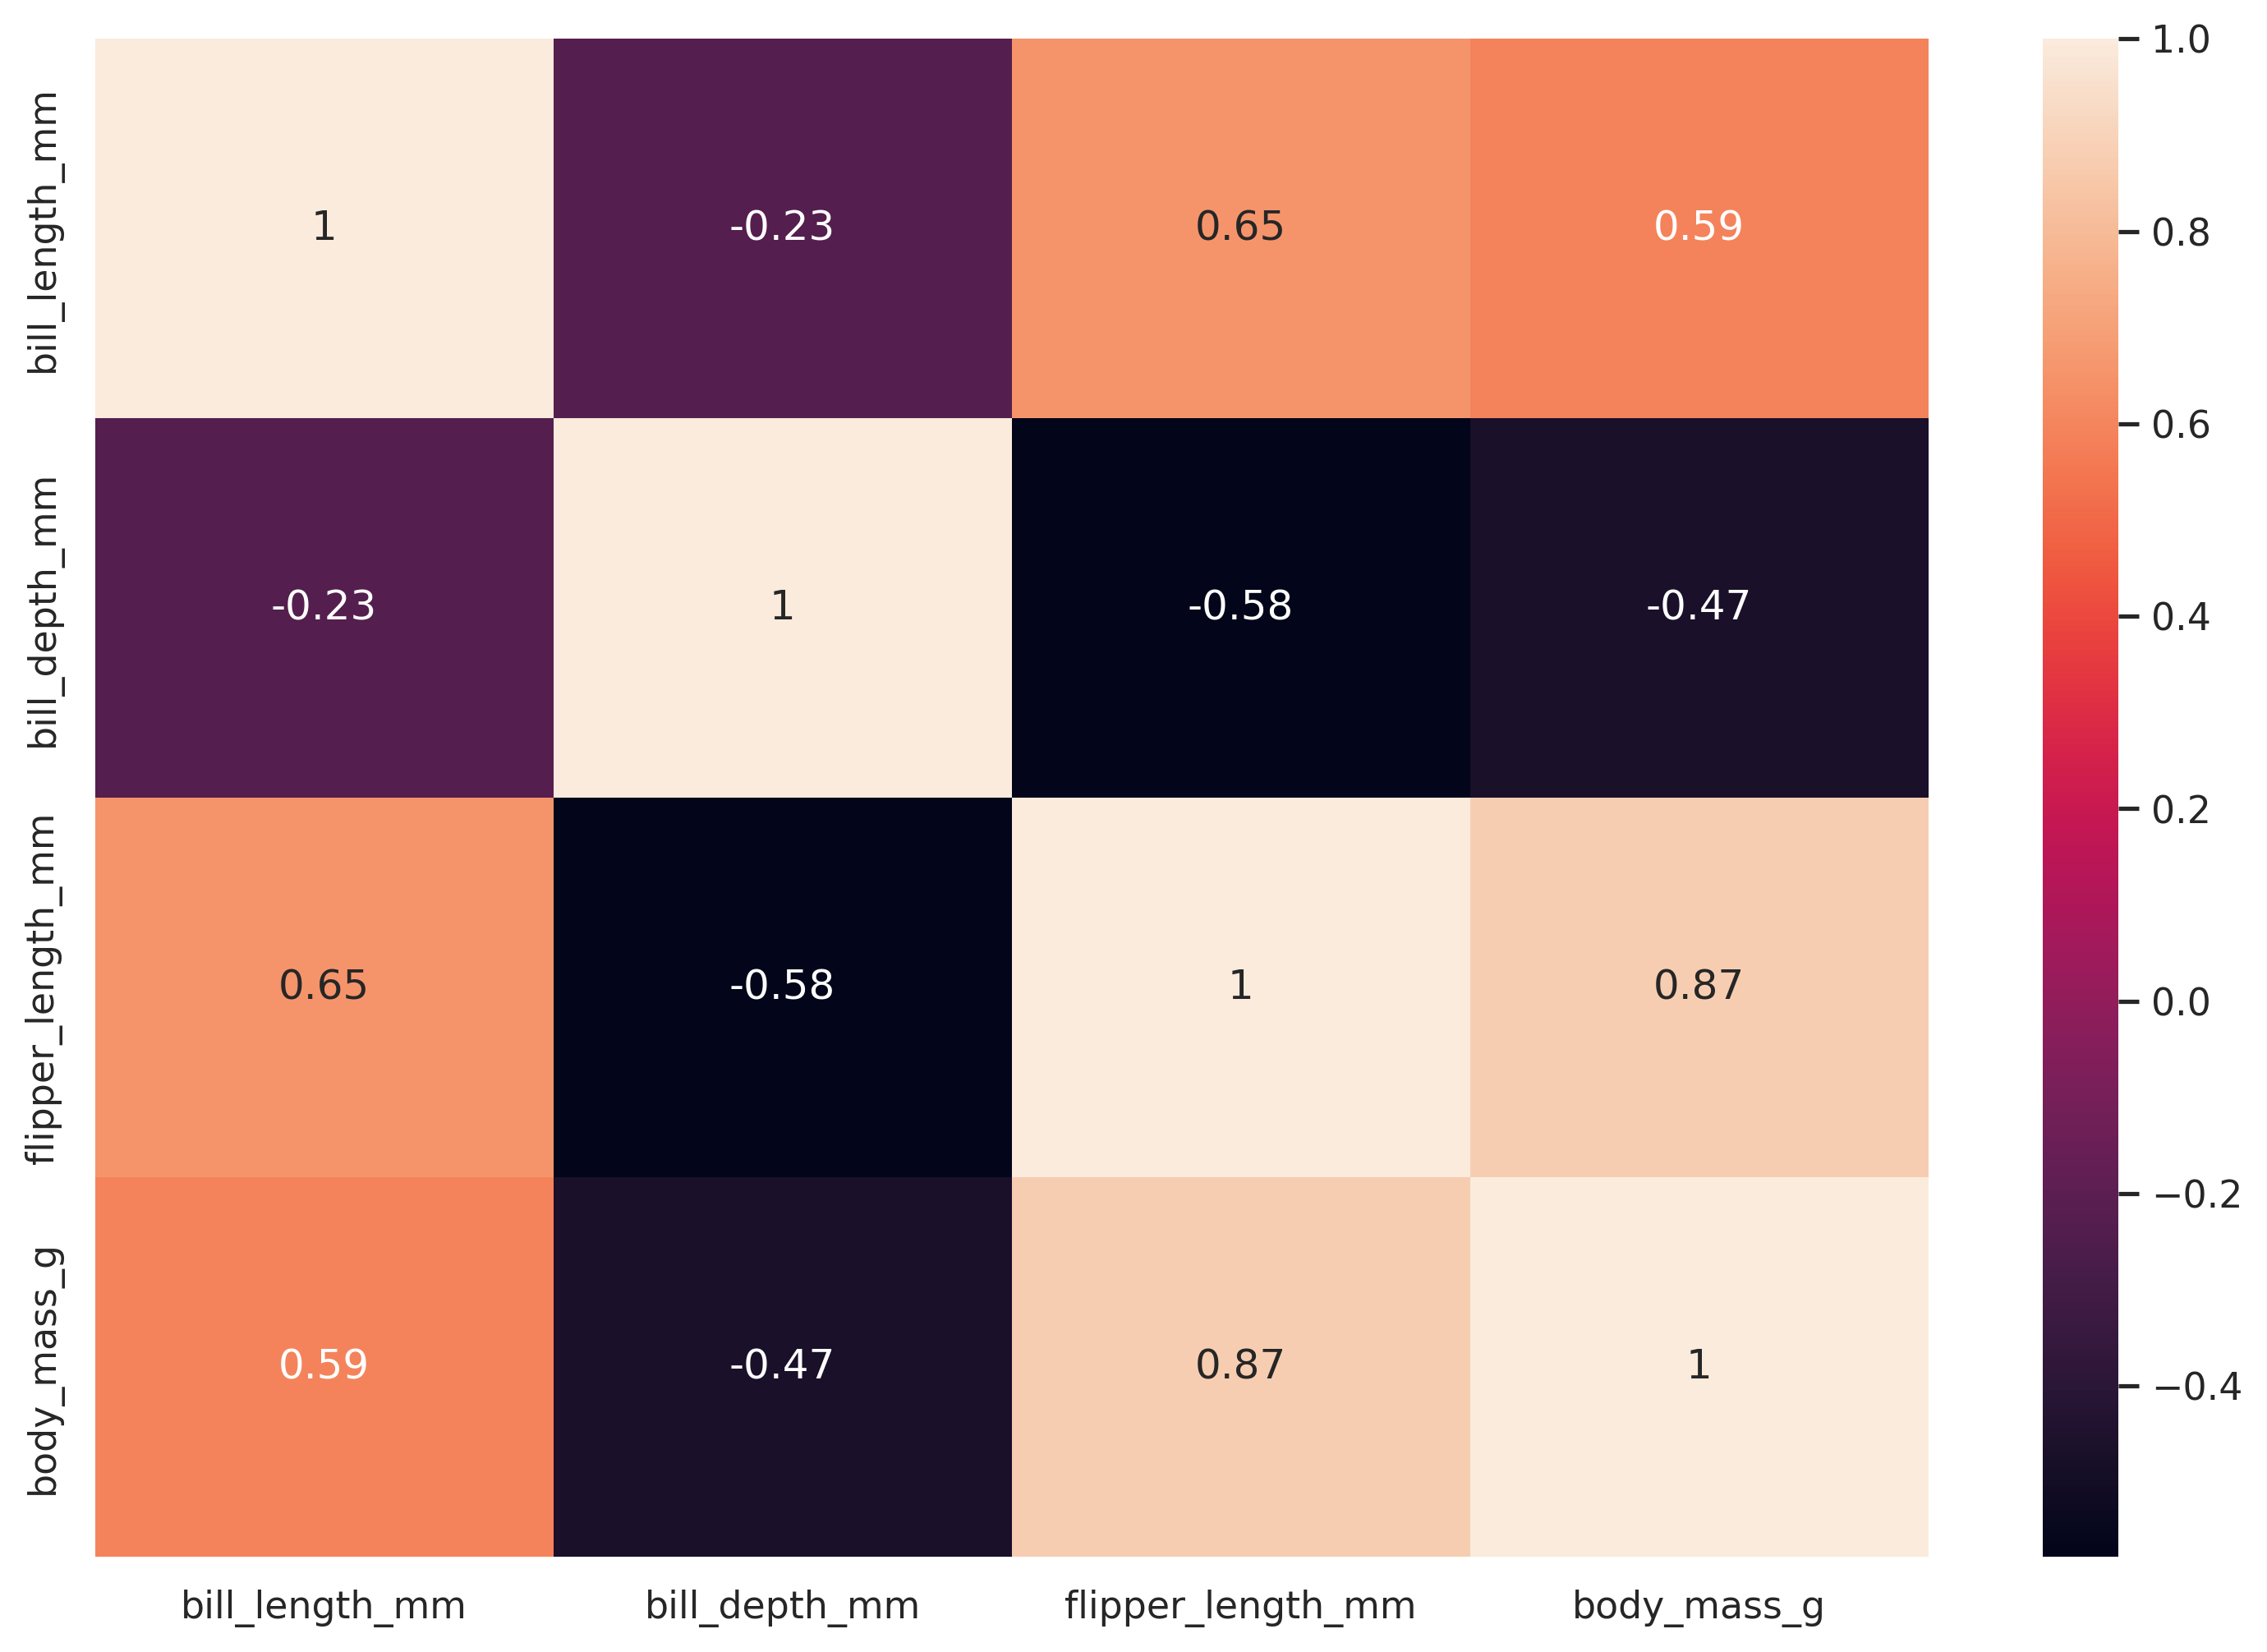

In [33]:
sns.heatmap(df.corr(), annot=True)